In [ ]:
pip install pycaret

In [ ]:
#Importing required libraries and functions
import pandas as pd
import numpy as np
import seaborn as sns
from pycaret.classification import setup, compare_models, create_model, tune_model, ensemble_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from pycaret.internal.tunable import VotingClassifier
import matplotlib.pyplot as plt

# **1st Dataset**

In [ ]:
# Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/ASM Research Project Datasets/stroke_prediction.csv')
print(data.head(10))

# Data Preprocessing
data.drop(['id'], axis=1, inplace=True)
data.drop_duplicates()
data.dropna()

# Manual encoding of categorical variables
data['gender'] = data['gender'].map({'Male' : 0, 'Female' : 1, 'Others' : 2})
data['Residence_type'] = data['Residence_type'].map({'Rural' : 0, 'Urban' : 1})
data['ever_married'] = data['ever_married'].map({'No' : 0, 'Yes' : 1})
data['work_type'] = data['work_type'].map({'children' : 0, 'Govt_job' : 1, 'Never_worked' : 2, 'Private' : 3, 'Self-employed' : 4})
data['smoking_status'] = data['smoking_status'].map({'formerly smoked' : 0, 'never smoked' : 1, 'smokes' : 2, 'Unknown' : 3})

# Compare Models and Select Top Models
setup(data, target = 'stroke')
best_models = compare_models(sort = 'Recall')


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private    

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1444
           1       0.28      0.10      0.15        89

    accuracy                           0.93      1533
   macro avg       0.61      0.54      0.56      1533
weighted avg       0.91      0.93      0.92      1533



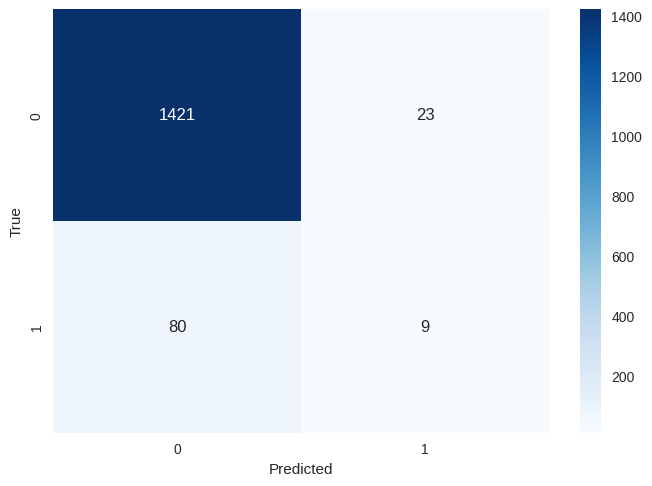

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1444
           1       0.19      0.43      0.27        89

    accuracy                           0.86      1533
   macro avg       0.58      0.66      0.60      1533
weighted avg       0.92      0.86      0.89      1533



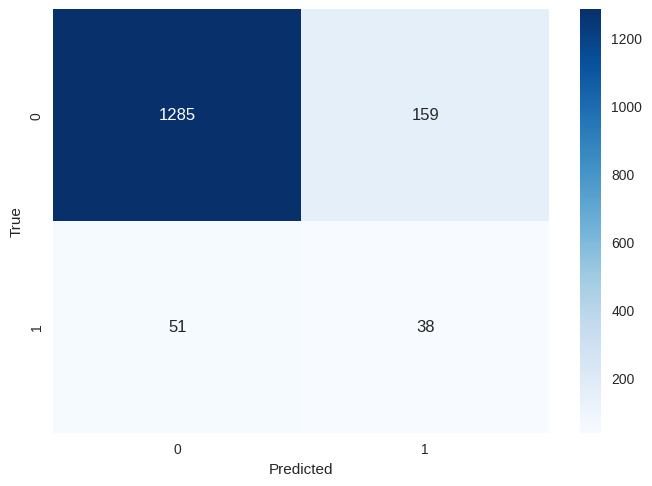

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1444
           1       0.41      0.08      0.13        89

    accuracy                           0.94      1533
   macro avg       0.68      0.54      0.55      1533
weighted avg       0.91      0.94      0.92      1533



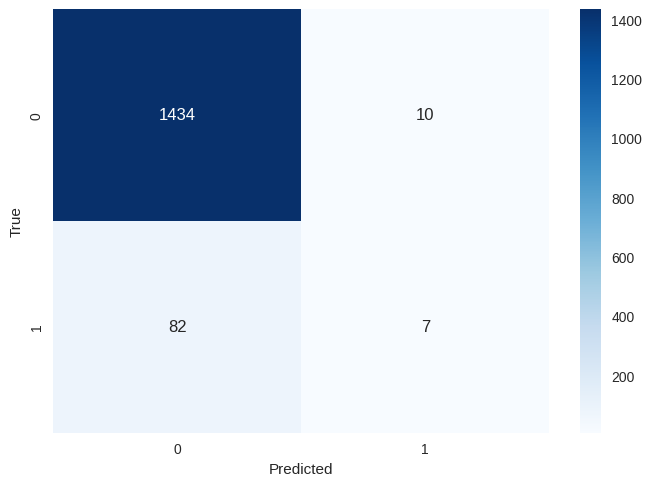

In [ ]:
# Manually Select Models
model1 = create_model('nb')
model2 = create_model('lda')
selected_models = [model1, model2]

# Fine-Tune Selected Models
tuned_models = [tune_model(model) for model in selected_models]

# Create a Hybrid Model (Voting Ensemble)
ensemble_model = VotingClassifier(estimators = [('Quantitative Discriminant', tuned_models[0]), ('Logistic Regression', tuned_models[1])], voting = 'soft')

# Split the dataset into train and test sets
X = data.drop('stroke', axis=1)
y = data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()

# Create an imputer with your preferred strategy (e.g., mean, median, mode)
imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on your dataset
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Training the hybrid model
ensemble_model.fit(X_train_imputed, y_train)

# Make predictions and evaluate the model
y_pred = ensemble_model.predict(X_test_imputed)
print(classification_report(y_test, y_pred))

# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Training of Model 1
model1.fit(X_train_imputed, y_train)
y_pred = model1.predict(X_test_imputed)
print(classification_report(y_test, y_pred))
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Training of Model 2
model2.fit(X_train_imputed, y_train)
y_pred = model2.predict(X_test_imputed)
print(classification_report(y_test, y_pred))
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

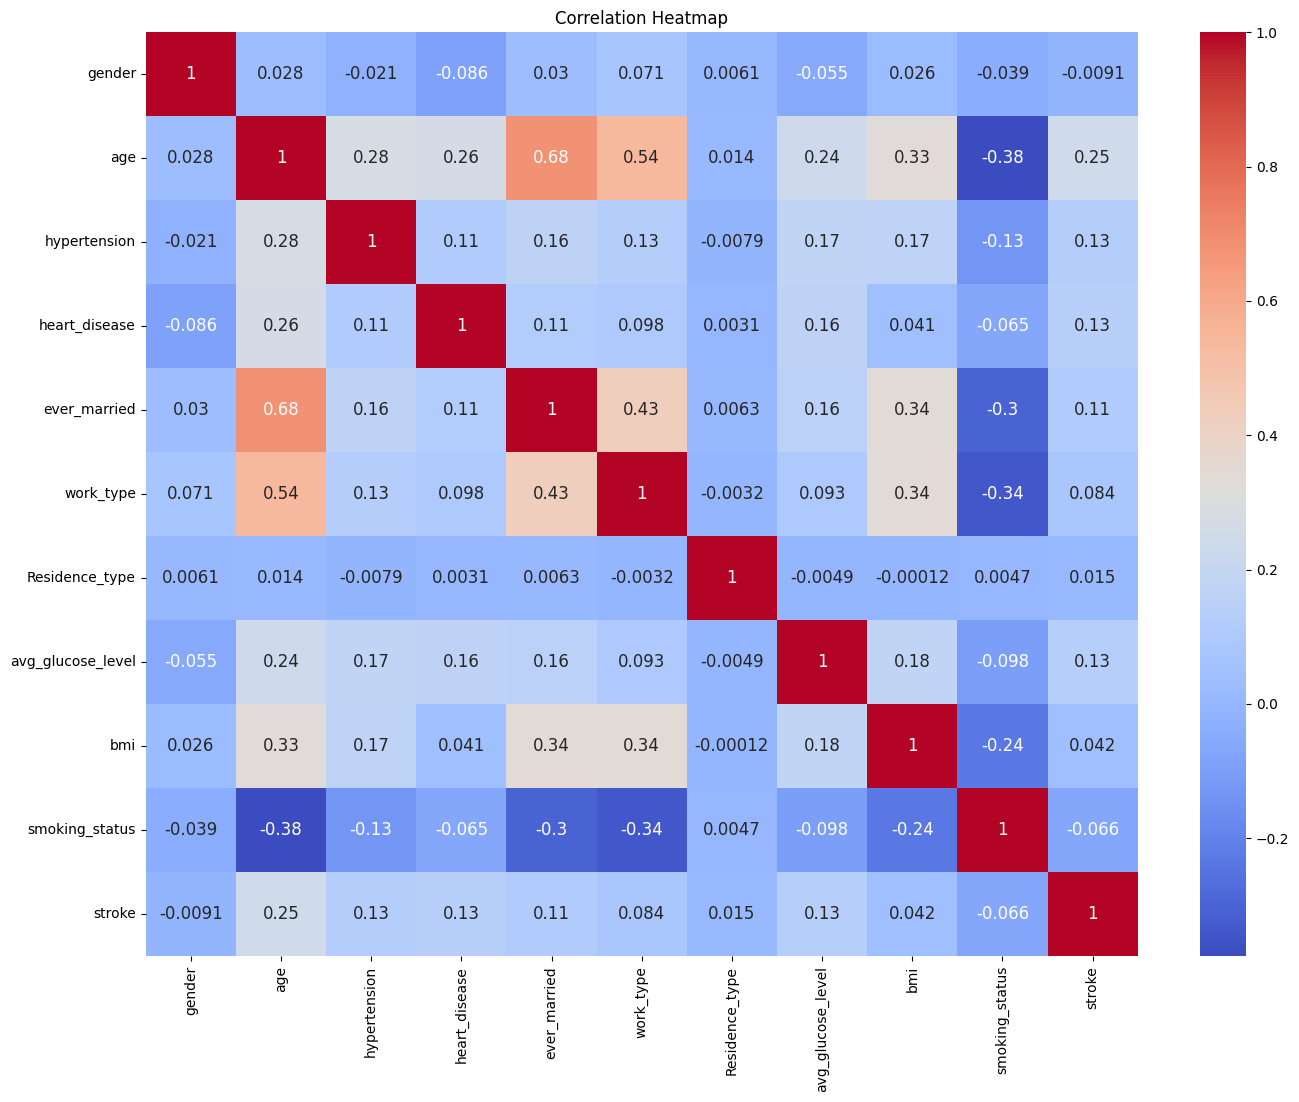

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(16, 12))  # Set a custom figure size

# Adjust the fontsize and other properties of the annotations
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", annot_kws={"size": 12})

plt.title("Correlation Heatmap")
plt.show()

# **2nd Dataset**

In [ ]:
# Loading another dataset
data1 = pd.read_csv('/content/drive/MyDrive/ASM Research Project Datasets/heart_failure_prediction.csv')
print(data1.head(10))

# Data Preprocessing
data1.drop_duplicates()
data1.dropna()

# Manual encoding of categorical variables
data1['Sex'] = data1['Sex'].map({'M' : 0, 'F' : 1})
data1['ChestPainType'] = data1['ChestPainType'].map({'TA' : 0, 'ATA' : 1, 'NAP' : 2, 'ASY' : 3})
data1['RestingECG'] = data1['RestingECG'].map({'Normal' : 0, 'ST' : 1, 'LVH' : 2})
data1['ExerciseAngina'] = data1['ExerciseAngina'].map({'N' : 0, 'Y' : 1})
data1['ST_Slope'] = data1['ST_Slope'].map({'Up' : 0, 'Flat' : 1, 'Down' : 2})

# Compare Models and Select Top Models
setup(data1, target = 'HeartDisease')
best_models = compare_models(sort = 'Recall')

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1     

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

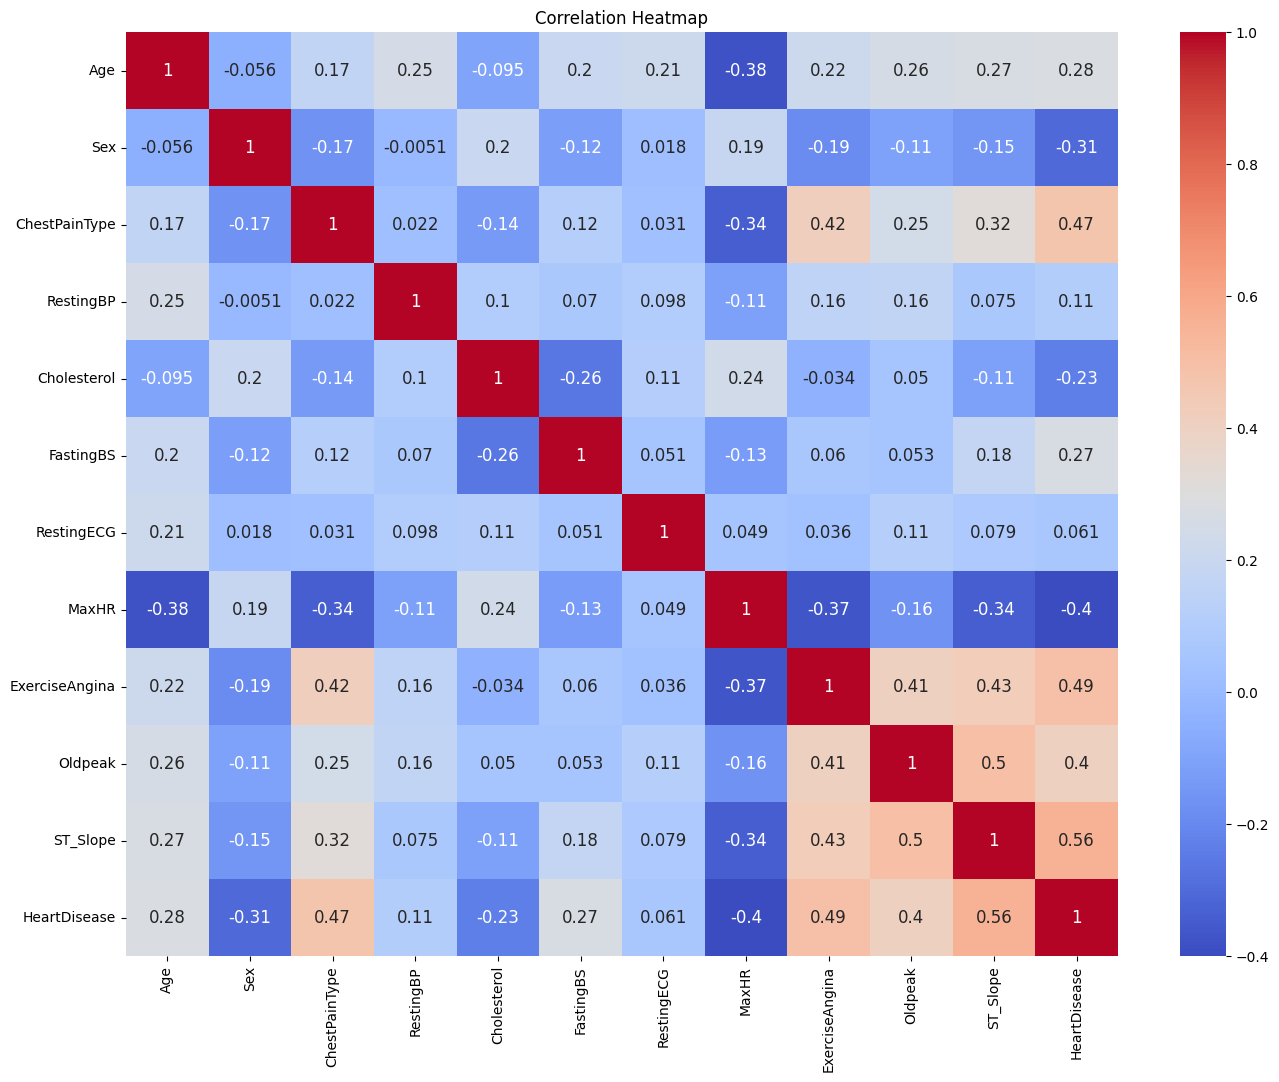

In [ ]:
correlation_matrix = data1.corr()

plt.figure(figsize=(16, 12))  # Set a custom figure size

# Adjust the fontsize and other properties of the annotations
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", annot_kws={"size": 12})

plt.title("Correlation Heatmap")
plt.show()

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       234
           1       0.91      0.87      0.89       317

    accuracy                           0.87       551
   macro avg       0.87      0.87      0.87       551
weighted avg       0.88      0.87      0.88       551



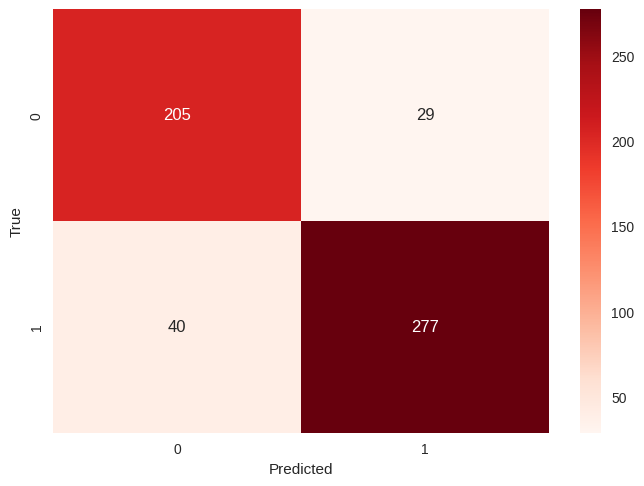

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       234
           1       0.92      0.85      0.88       317

    accuracy                           0.87       551
   macro avg       0.87      0.87      0.87       551
weighted avg       0.87      0.87      0.87       551



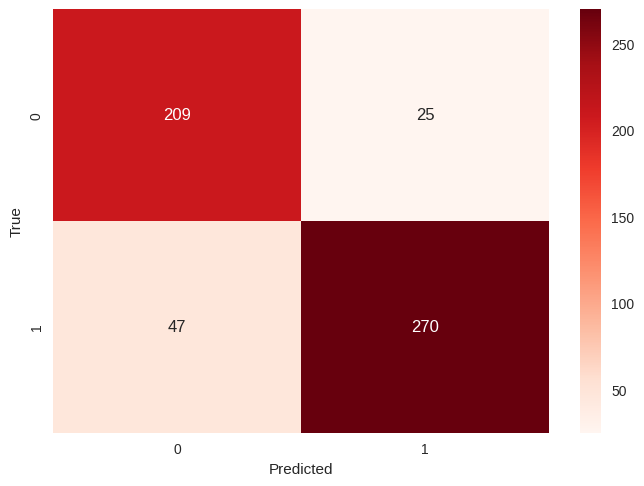

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       234
           1       0.92      0.85      0.88       317

    accuracy                           0.87       551
   macro avg       0.87      0.87      0.87       551
weighted avg       0.88      0.87      0.87       551



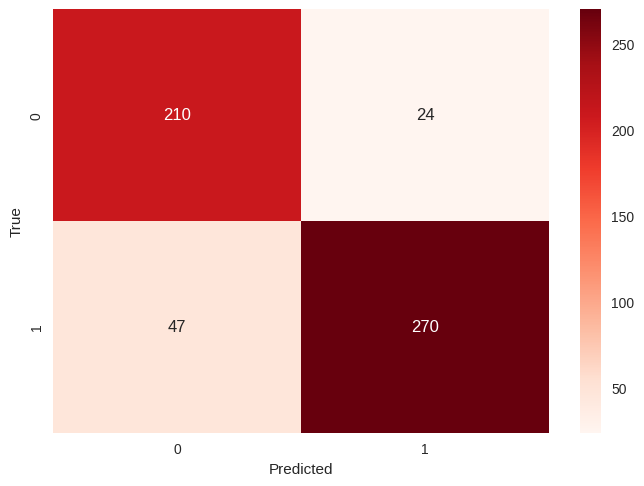

In [ ]:
# Manually Select Models
model1 = create_model('rf')
model2 = create_model('et')
selected_models = [model1, model2]

# Fine-Tune Selected Models
tuned_models = [tune_model(model) for model in selected_models]

# Create a Hybrid Model (Voting Ensemble)
ensemble_model = VotingClassifier(estimators = [('Gradient Boost', tuned_models[0]), ('Extra Tree', tuned_models[1])], voting = 'soft')

# Split the dataset into train and test sets
X = data1.drop('HeartDisease', axis=1)
y = data1['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
X_train.head()

# Create an imputer with your preferred strategy (e.g., mean, median, mode)
imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on your dataset
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Training the hybrid model
ensemble_model.fit(X_train_imputed, y_train)

# Make predictions and evaluate the model
y_pred = ensemble_model.predict(X_test_imputed)
print(classification_report(y_test, y_pred))

# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Training of Model 1
model1.fit(X_train_imputed, y_train)
y_pred = model1.predict(X_test_imputed)
print(classification_report(y_test, y_pred))
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Training of Model 2
model2.fit(X_train_imputed, y_train)
y_pred = model2.predict(X_test_imputed)
print(classification_report(y_test, y_pred))
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **3rd Dataset**

In [ ]:
# Loading another dataset
data2 = pd.read_csv('/content/drive/MyDrive/ASM Research Project Datasets/heart_failure_clinical_records_prediction.csv')
data2.head(10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   
5  90.0        1                        47         0                 40   
6  75.0        1                       246         0                 15   
7  60.0        1                       315         1                 60   
8  65.0        0                       157         0                 65   
9  80.0        1                       123         0                 35   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   
5                    1  204000.00               2.1           132    1   
6                    0  127000.00               1.2           137    1   
7                    0  454000.00               1.1           131    1   
8                    0  263358.03               1.5           138    0   
9                    1  388000.00               9.4           133    1   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1  
5        1     8            1  
6        0    10            1  
7        1    10            1  
8        0    10            1  
9        1    10            1

In [ ]:
# Data Preprocessing
data2.drop_duplicates()
data2.dropna()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [ ]:
# Exploratory Data Analysis(EDA)
pairplot_class_1 = sns.pairplot(data = data2[data2['DEATH_EVENT'] == 1], hue='DEATH_EVENT')
pairplot_class_1.fig.suptitle("Pairplot for Class 1", y = 1.02)
pairplot_class_0 = sns.pairplot(data = data2[data2['DEATH_EVENT'] == 0], hue='DEATH_EVENT')
pairplot_class_0.fig.suptitle("Pairplot for Class 0", y = 1.02)
plt.show()

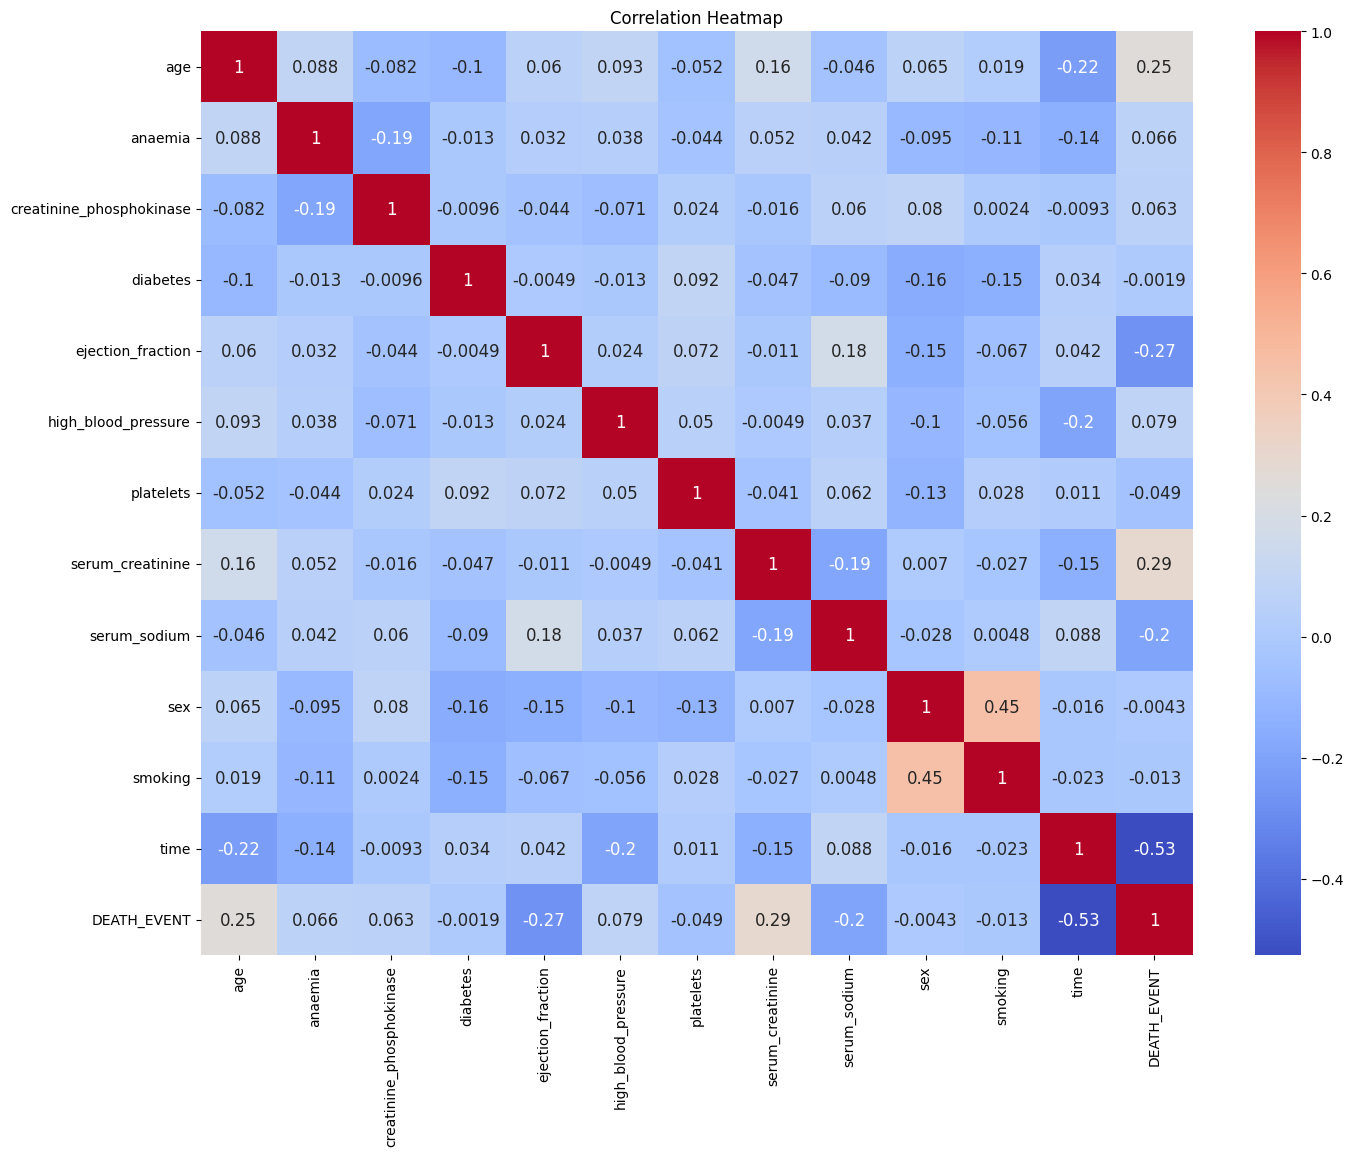

In [ ]:
correlation_matrix = data2.corr()

plt.figure(figsize=(16, 12))  # Set a custom figure size

# Adjust the fontsize and other properties of the annotations
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", annot_kws={"size": 12})

plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Compare Models and Select Top Models
setup(data2, target = 'DEATH_EVENT')
best_models = compare_models(sort = 'Recall')

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
[LightGBM] [Info] Number of positive: 59, number of negative: 150
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 269
[LightGBM] [Info] Number of data points in the train set: 209, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.282297 -> initscore=-0.933098
[LightGBM] [Info] Start training from score -0.933098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

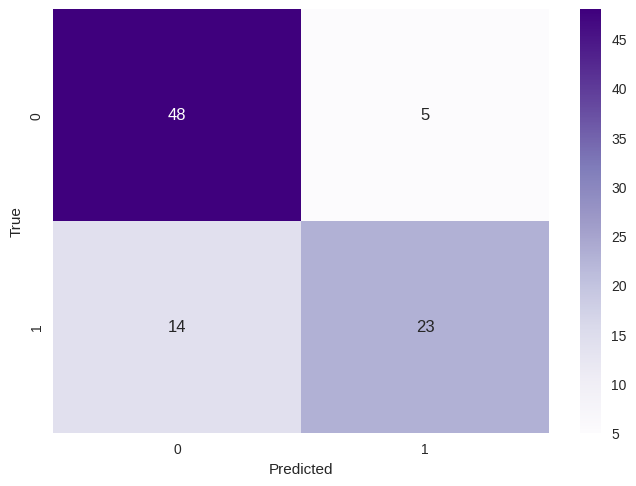

[LightGBM] [Info] Number of positive: 59, number of negative: 150
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 269
[LightGBM] [Info] Number of data points in the train set: 209, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.282297 -> initscore=-0.933098
[LightGBM] [Info] Start training from score -0.933098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


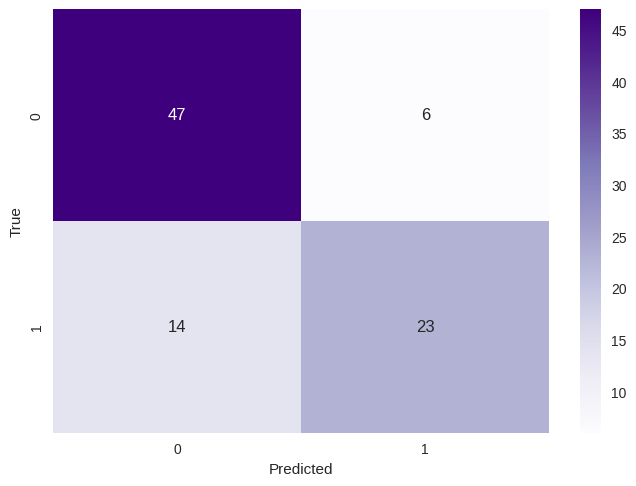

              precision    recall  f1-score   support

           0       0.75      0.89      0.81        53
           1       0.78      0.57      0.66        37

    accuracy                           0.76        90
   macro avg       0.76      0.73      0.73        90
weighted avg       0.76      0.76      0.75        90



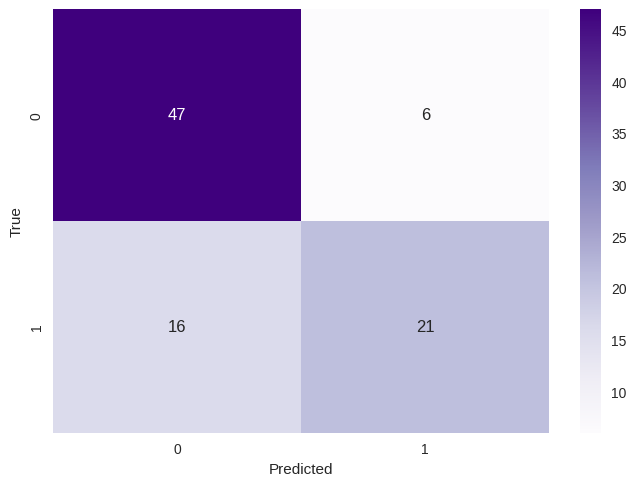

In [ ]:
# Manually Select Models
model1 = create_model('lightgbm')
model2 = create_model('xgboost')
selected_models = [model1, model2]

# Fine-Tune Selected Models
tuned_models = [tune_model(model) for model in selected_models]

# Create a Hybrid Model (Voting Ensemble)
ensemble_model = VotingClassifier(estimators = [('Gradient Boost', tuned_models[0]), ('Random Forest', tuned_models[1])], voting = 'soft')

# Split the dataset into train and test sets
X = data2.drop('DEATH_EVENT', axis=1)
y = data2['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()

# Create an imputer with your preferred strategy (e.g., mean, median, mode)
imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on your dataset
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Training the hybrid model
ensemble_model.fit(X_train_imputed, y_train)

# Make predictions and evaluate the model
y_pred = ensemble_model.predict(X_test_imputed)
print(classification_report(y_test, y_pred))

# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Training of Model 1
model1.fit(X_train_imputed, y_train)
y_pred = model1.predict(X_test_imputed)
print(classification_report(y_test, y_pred))
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Training of Model 2
model2.fit(X_train_imputed, y_train)
y_pred = model2.predict(X_test_imputed)
print(classification_report(y_test, y_pred))
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#**4th Dataset**

In [ ]:
# Loading another dataset
data3 = pd.read_csv('/content/drive/MyDrive/ASM Research Project Datasets/heart_disease.csv')
data3.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   70    1   4       130   322    0        2      109      0      2.4      2   
1   67    0   3       115   564    0        2      160      0      1.6      2   
2   57    1   2       124   261    0        0      141      0      0.3      1   
3   64    1   4       128   263    0        0      105      1      0.2      2   
4   74    0   2       120   269    0        2      121      1      0.2      1   
5   65    1   4       120   177    0        0      140      0      0.4      1   
6   56    1   3       130   256    1        2      142      1      0.6      2   
7   59    1   4       110   239    0        2      142      1      1.2      2   
8   60    1   4       140   293    0        2      170      0      1.2      2   
9   63    0   4       150   407    0        2      154      0      4.0      2   

   ca  thal  target  
0   3     3       2  
1   0     7       1  
2   0     7       2  
3   1     7       1  
4   1     3       1  
5   0     7       1  
6   1     6       2  
7   1     7       2  
8   2     7       2  
9   3     7       2

In [ ]:
# Data Preprocessing
data3.drop_duplicates()
data3.dropna()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     70    1   4       130   322    0        2      109      0      2.4   
1     67    0   3       115   564    0        2      160      0      1.6   
2     57    1   2       124   261    0        0      141      0      0.3   
3     64    1   4       128   263    0        0      105      1      0.2   
4     74    0   2       120   269    0        2      121      1      0.2   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
265   52    1   3       172   199    1        0      162      0      0.5   
266   44    1   2       120   263    0        0      173      0      0.0   
267   56    0   2       140   294    0        2      153      0      1.3   
268   57    1   4       140   192    0        0      148      0      0.4   
269   67    1   4       160   286    0        2      108      1      1.5   

     slope  ca  thal  target  
0        2   3     3       2  
1        2   0     7       1  
2        1   0     7       2  
3        2   1     7       1  
4        1   1     3       1  
..     ...  ..   ...     ...  
265      1   0     7       1  
266      1   0     7       1  
267      2   0     3       1  
268      2   0     6       1  
269      2   3     3       2  

[270 rows x 14 columns]

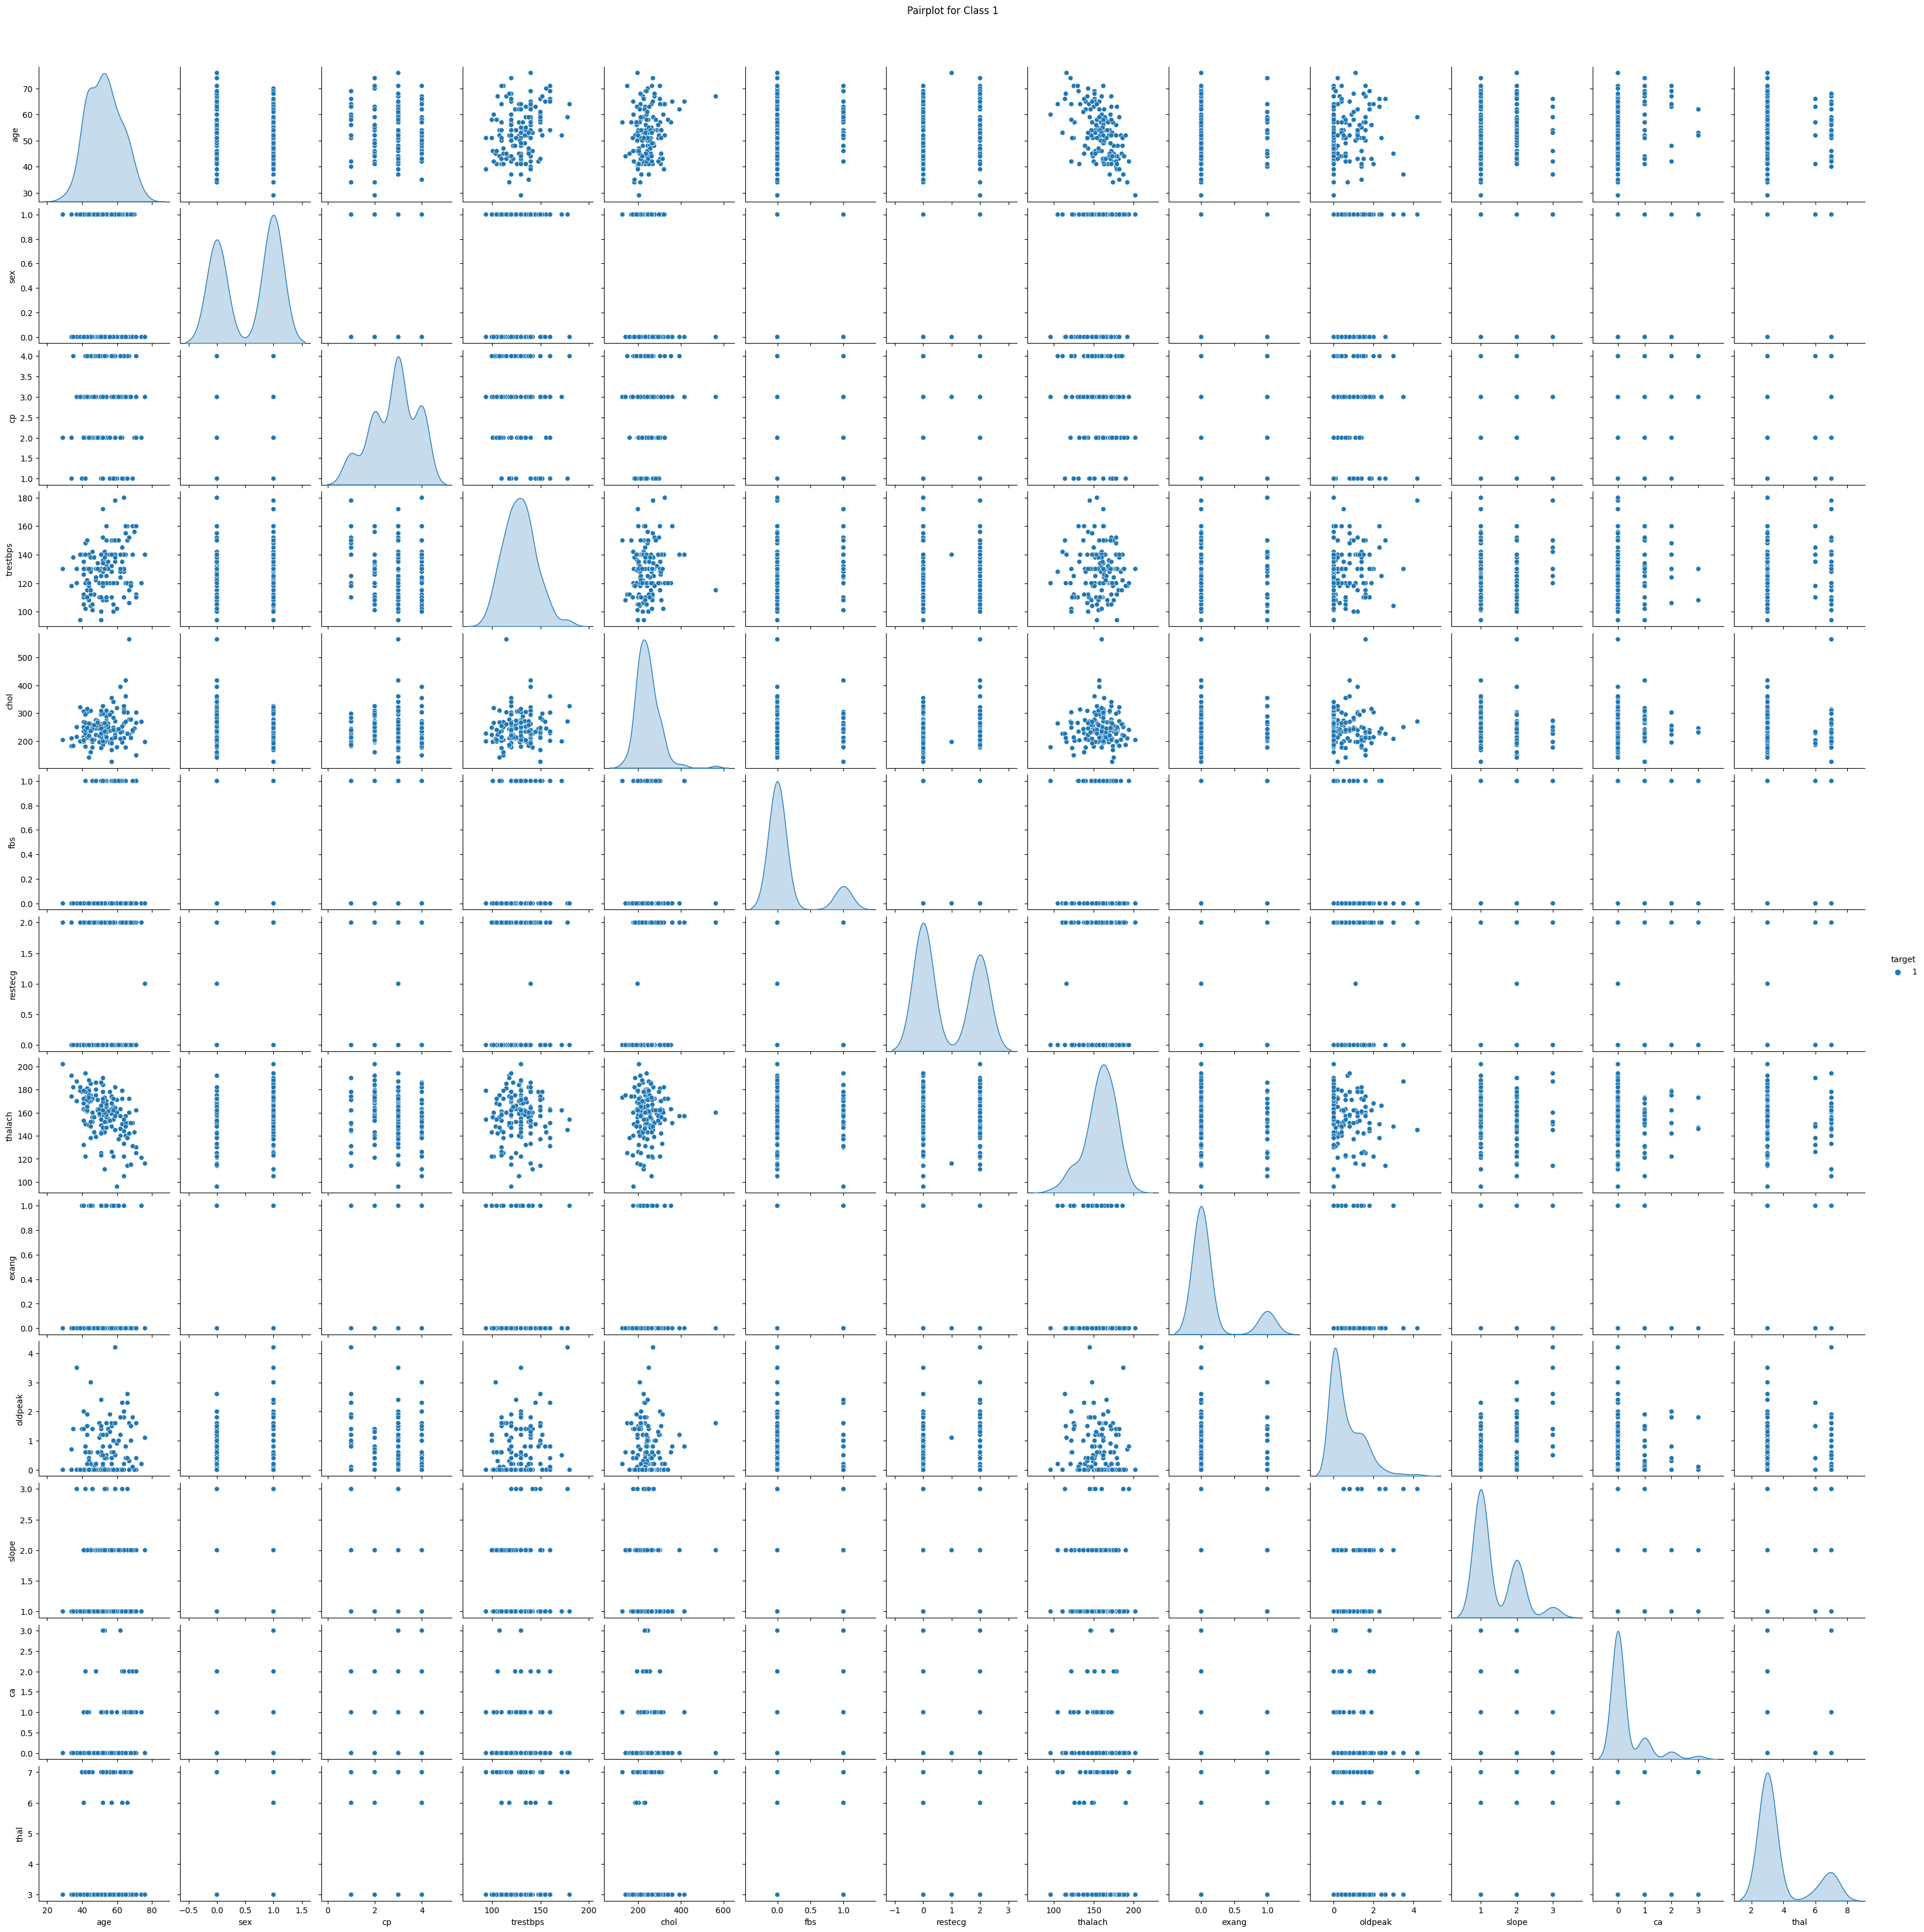

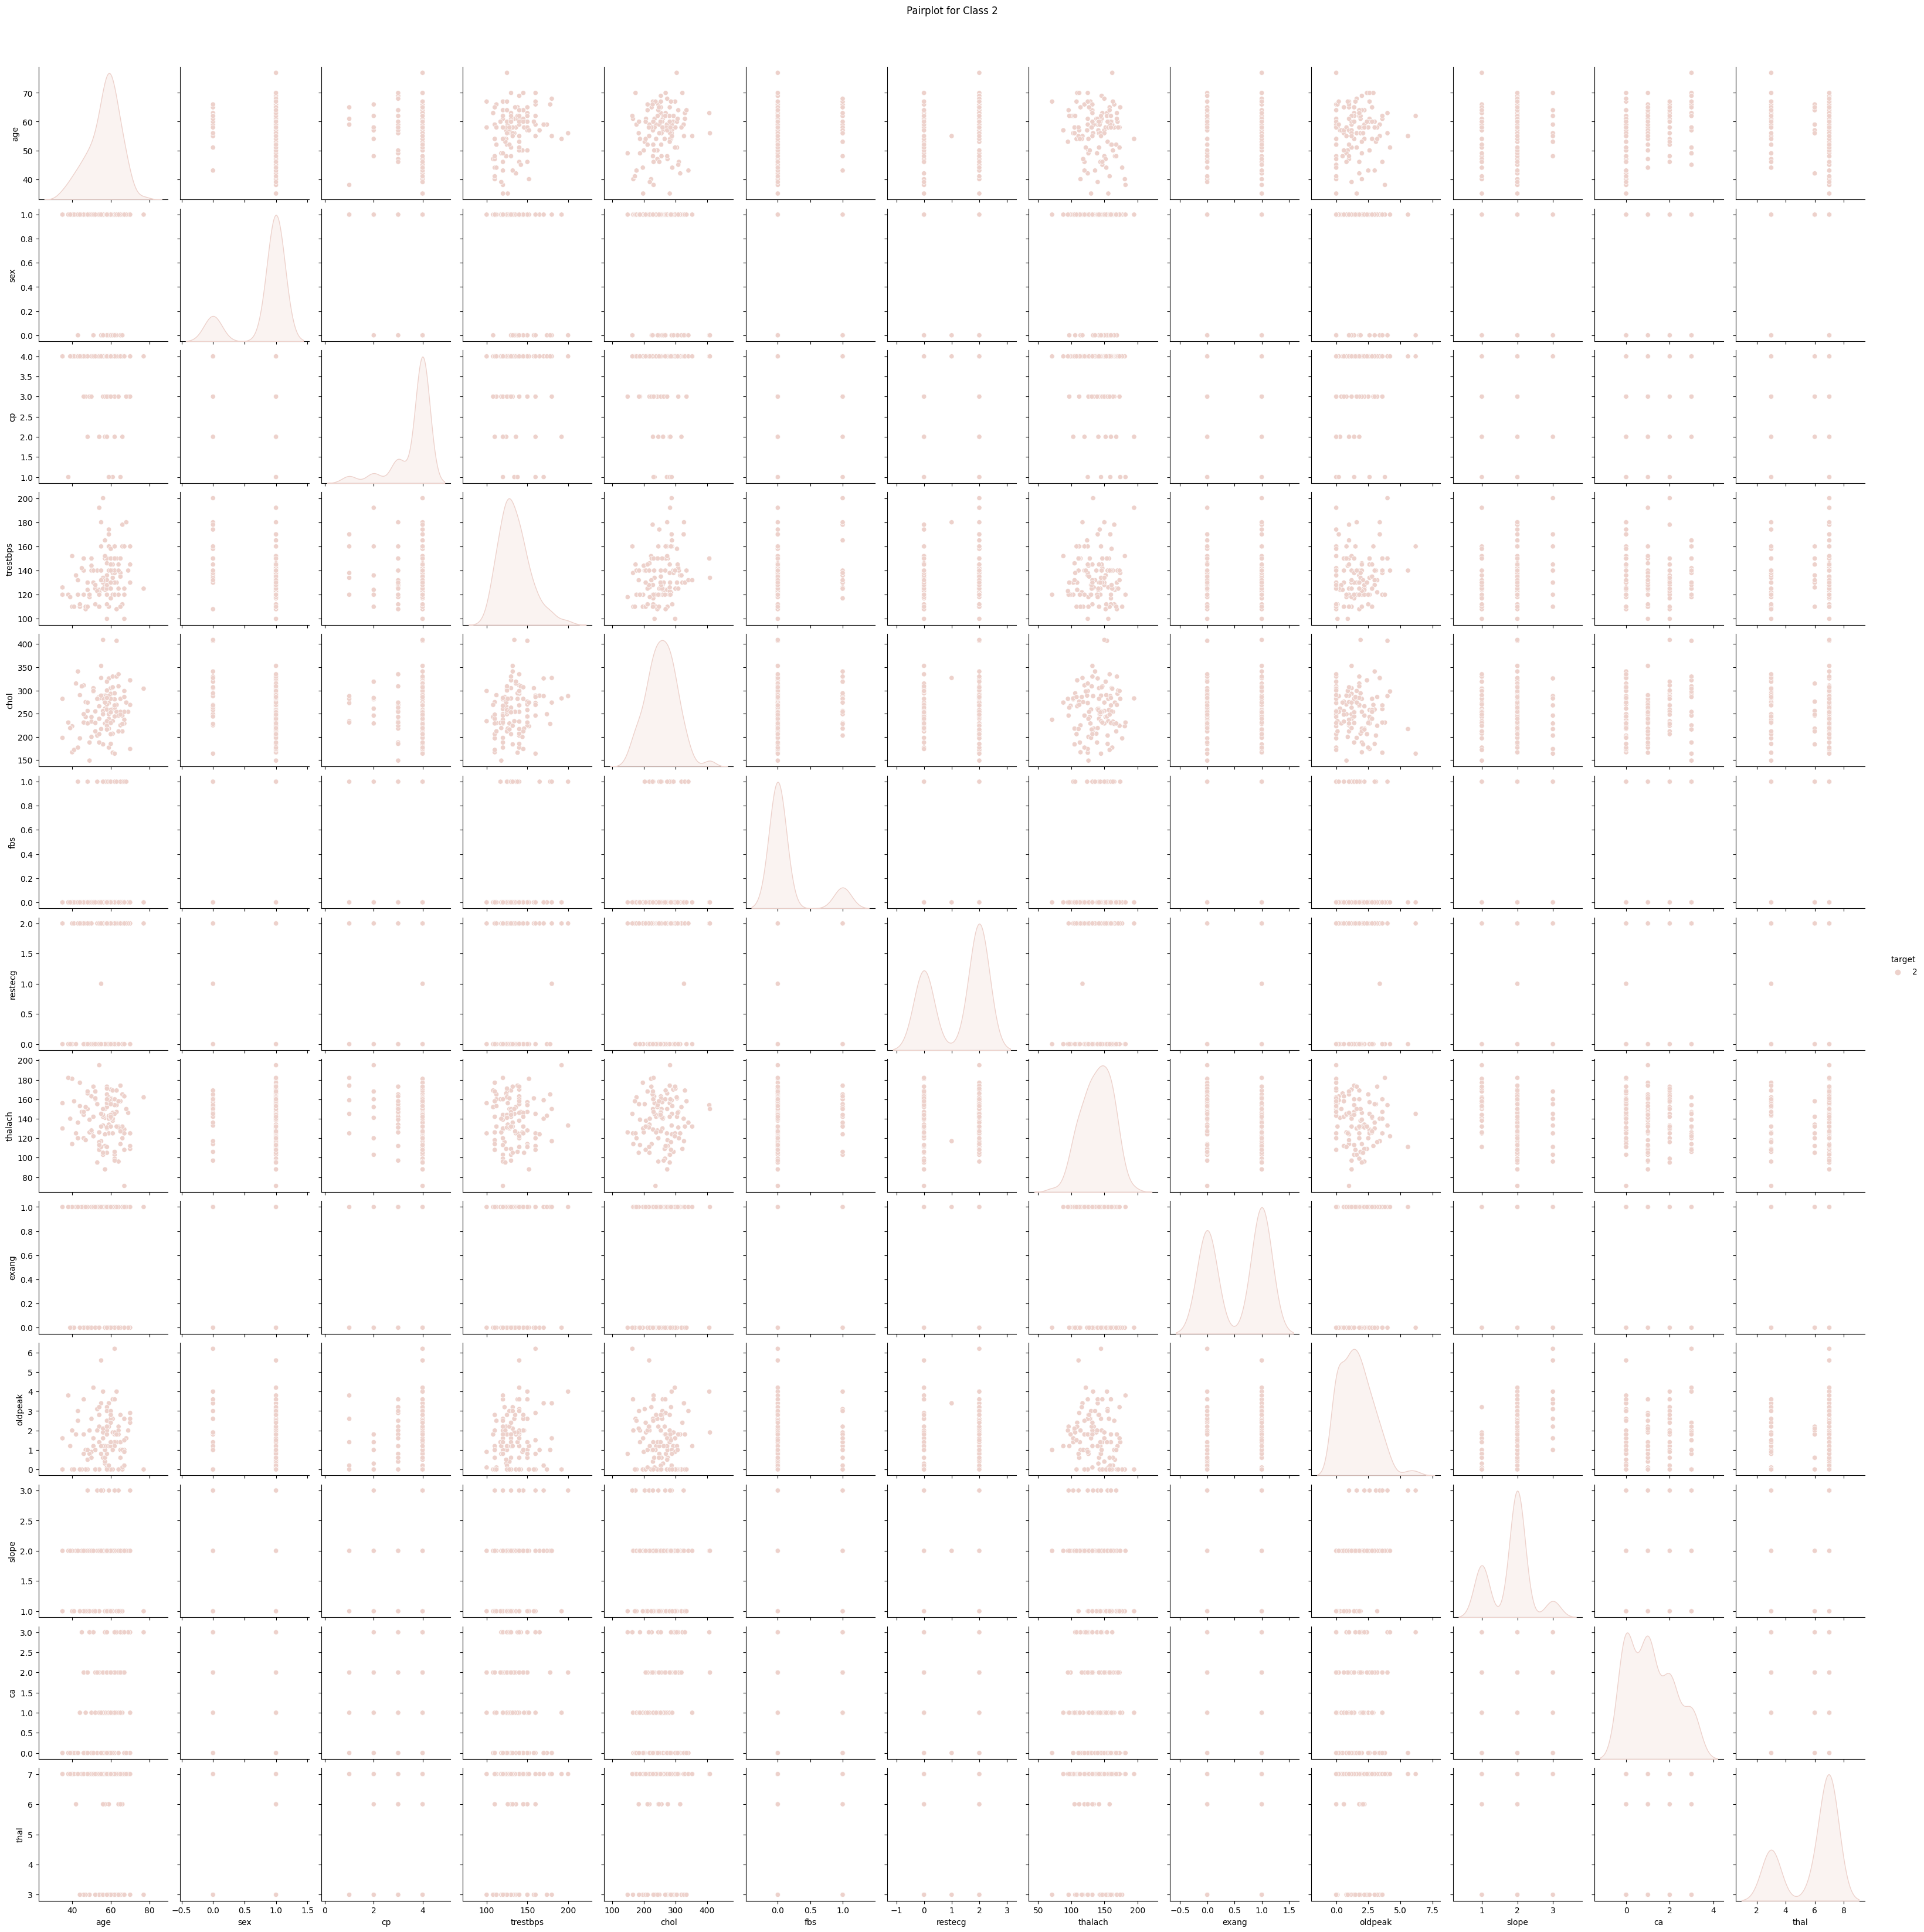

In [ ]:
# Exploratory Data Analysis(EDA)
pairplot_class_1 = sns.pairplot(data = data3[data3['target'] == 1], hue='target')
pairplot_class_1.fig.suptitle("Pairplot for Class 1", y = 1.02)
pairplot_class_2 = sns.pairplot(data = data3[data3['target'] == 2], hue='target')
pairplot_class_2.fig.suptitle("Pairplot for Class 2", y = 1.02)
plt.show()

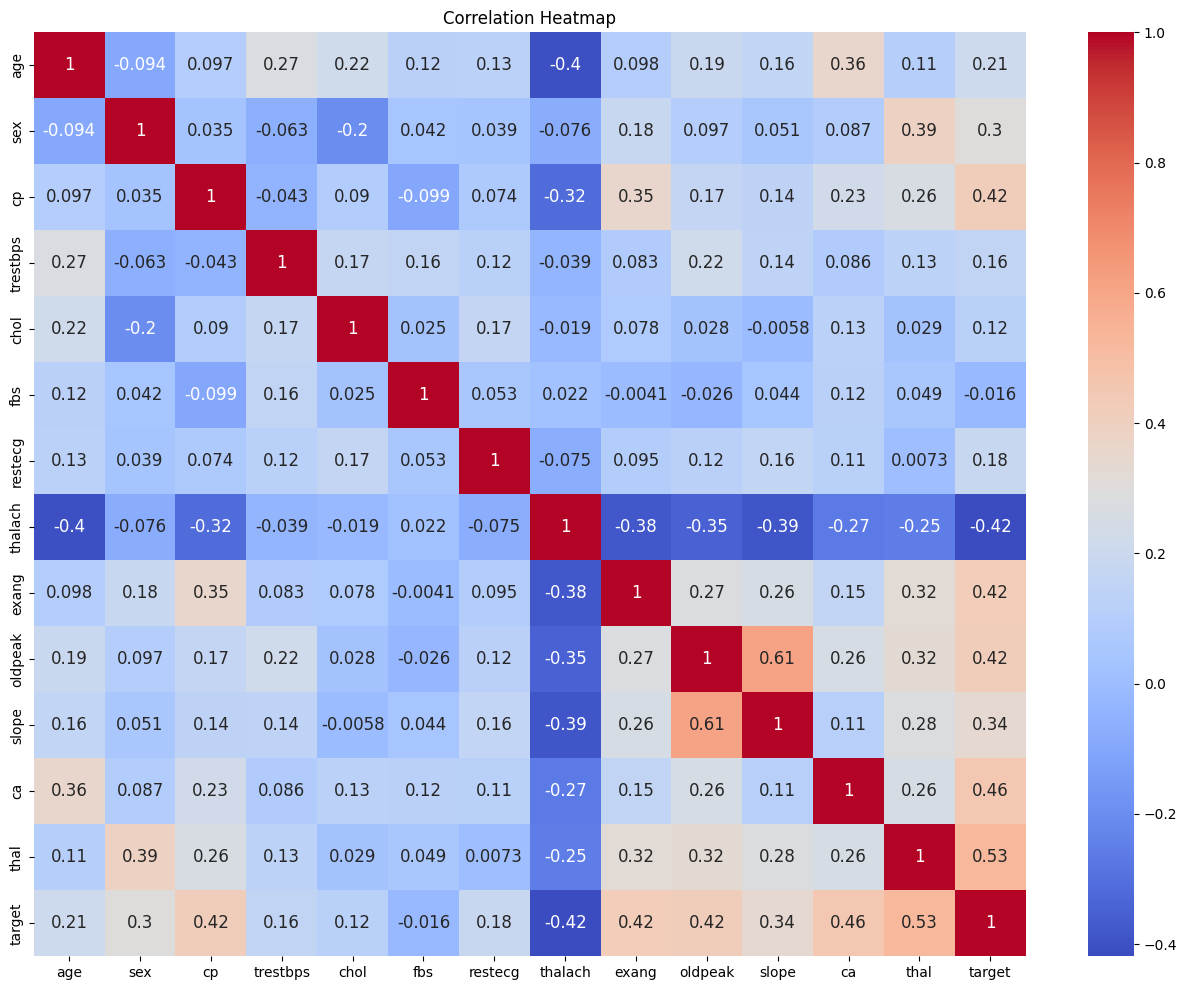

In [ ]:
correlation_matrix = data3.corr()

plt.figure(figsize=(16, 12))  # Set a custom figure size

# Adjust the fontsize and other properties of the annotations
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", annot_kws={"size": 12})

plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Compare Models and Select Top Models
setup(data3, target = 'target')
best_models = compare_models(sort = 'Recall')

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
              precision    recall  f1-score   support

           1       0.84      0.94      0.88        49
           2       0.88      0.72      0.79        32

    accuracy                           0.85        81
   macro avg       0.86      0.83      0.84        81
weighted avg       0.86      0.85      0.85        81



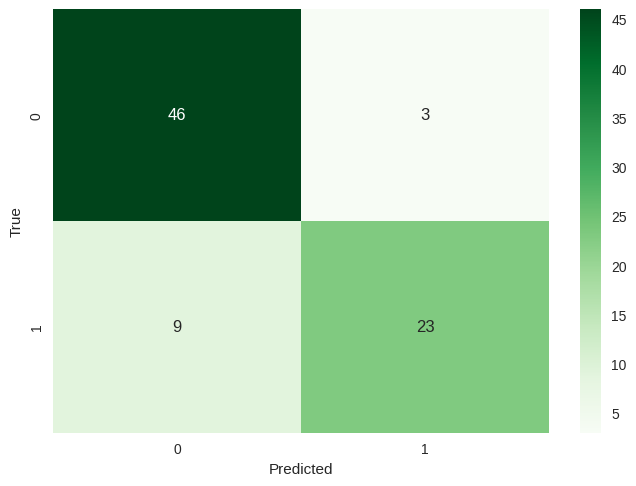

              precision    recall  f1-score   support

           1       0.82      0.94      0.88        49
           2       0.88      0.69      0.77        32

    accuracy                           0.84        81
   macro avg       0.85      0.81      0.82        81
weighted avg       0.84      0.84      0.84        81



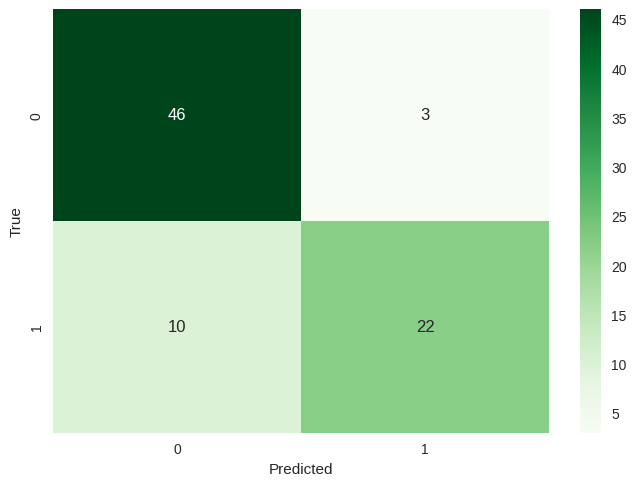

              precision    recall  f1-score   support

           1       0.81      0.94      0.87        49
           2       0.88      0.66      0.75        32

    accuracy                           0.83        81
   macro avg       0.84      0.80      0.81        81
weighted avg       0.83      0.83      0.82        81



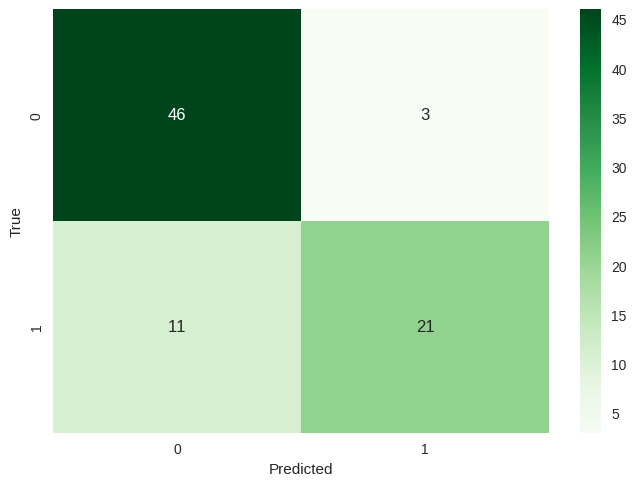

In [ ]:
# Manually Select Models
model1 = create_model('nb')
model2 = create_model('lr')
selected_models = [model1, model2]

# Fine-Tune Selected Models
tuned_models = [tune_model(model) for model in selected_models]

# Create a Hybrid Model (Voting Ensemble)
ensemble_model = VotingClassifier(estimators = [('Light Gradient Boosting', tuned_models[0]), ('Logistic Regression', tuned_models[1])], voting = 'soft')

# Split the dataset into train and test sets
X = data3.drop('target', axis=1)
y = data3['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()

# Create an imputer with your preferred strategy (e.g., mean, median, mode)
imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on your dataset
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Training the hybrid model
ensemble_model.fit(X_train_imputed, y_train)

# Make predictions and evaluate the model
y_pred = ensemble_model.predict(X_test_imputed)
print(classification_report(y_test, y_pred))

# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Training of Model 1
model1.fit(X_train_imputed, y_train)
y_pred = model1.predict(X_test_imputed)
print(classification_report(y_test, y_pred))
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Training of Model 2
model2.fit(X_train_imputed, y_train)
y_pred = model2.predict(X_test_imputed)
print(classification_report(y_test, y_pred))
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#**5th Dataset**

In [ ]:
# Loading another dataset
data4 = pd.read_csv('/content/drive/MyDrive/ASM Research Project Datasets/cleveland_heart_disease.csv')
data4.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   
5   56    1   2       120   236    0        0      178      0      0.8      1   
6   62    0   4       140   268    0        2      160      0      3.6      3   
7   57    0   4       120   354    0        0      163      1      0.6      1   
8   63    1   4       130   254    0        2      147      0      1.4      2   
9   53    1   4       140   203    1        2      155      1      3.1      3   

  ca thal  num  
0  0    6    0  
1  3    3    2  
2  2    7    1  
3  0    3    0  
4  0    3    0  
5  0    3    0  
6  2    3    3  
7  0    3    0  
8  1    7    2  
9  0    7    1

In [ ]:
# Data Preprocessing
data4.drop_duplicates()
data4.dropna()

most_frequent_value = data4['thal'].mode()[0]
data4['thal'] = data4['thal'].replace('?', most_frequent_value)

most_frequent_value = data4['ca'].mode()[0]
data4['ca'] = data4['ca'].replace('?', most_frequent_value)

data4

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope ca thal  num  
0        3  0    6    0  
1        2  3    3    2  
2        2  2    7    1  
3        3  0    3    0  
4        1  0    3    0  
..     ... ..  ...  ...  
298      2  0    7    1  
299      2  2    7    2  
300      2  1    7    3  
301      2  1    3    1  
302      1  0    3    0  

[303 rows x 14 columns]

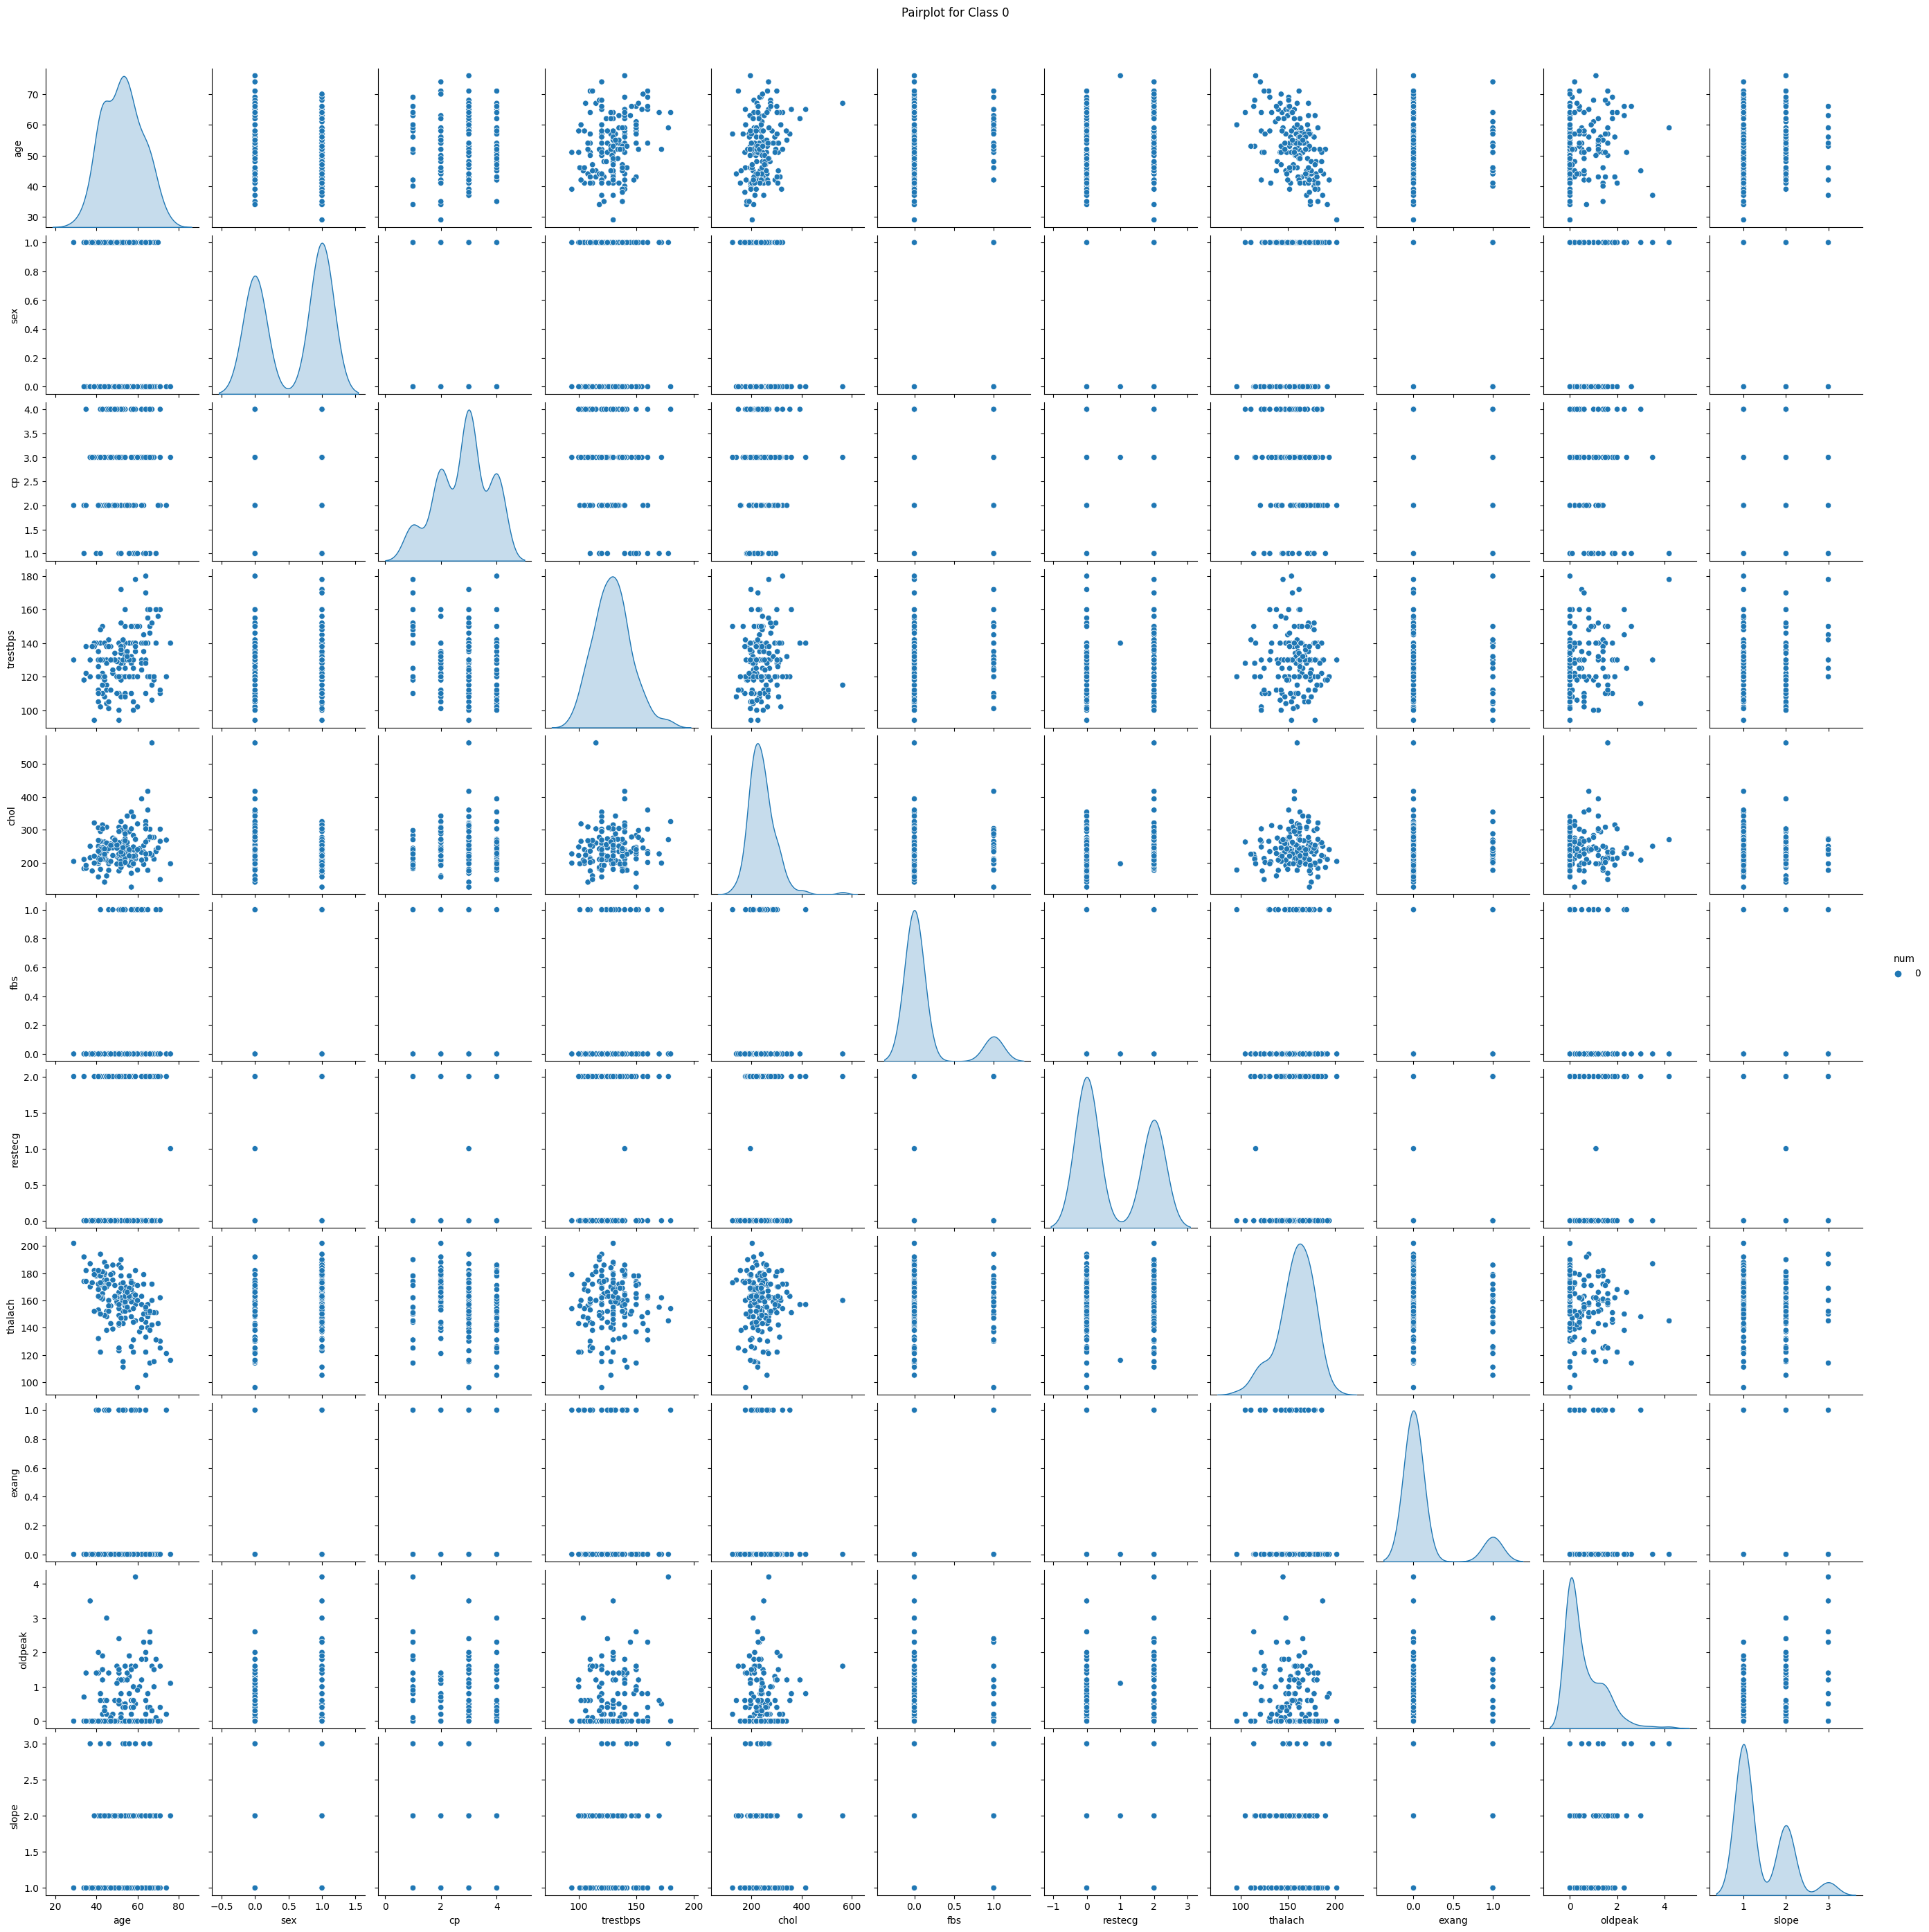

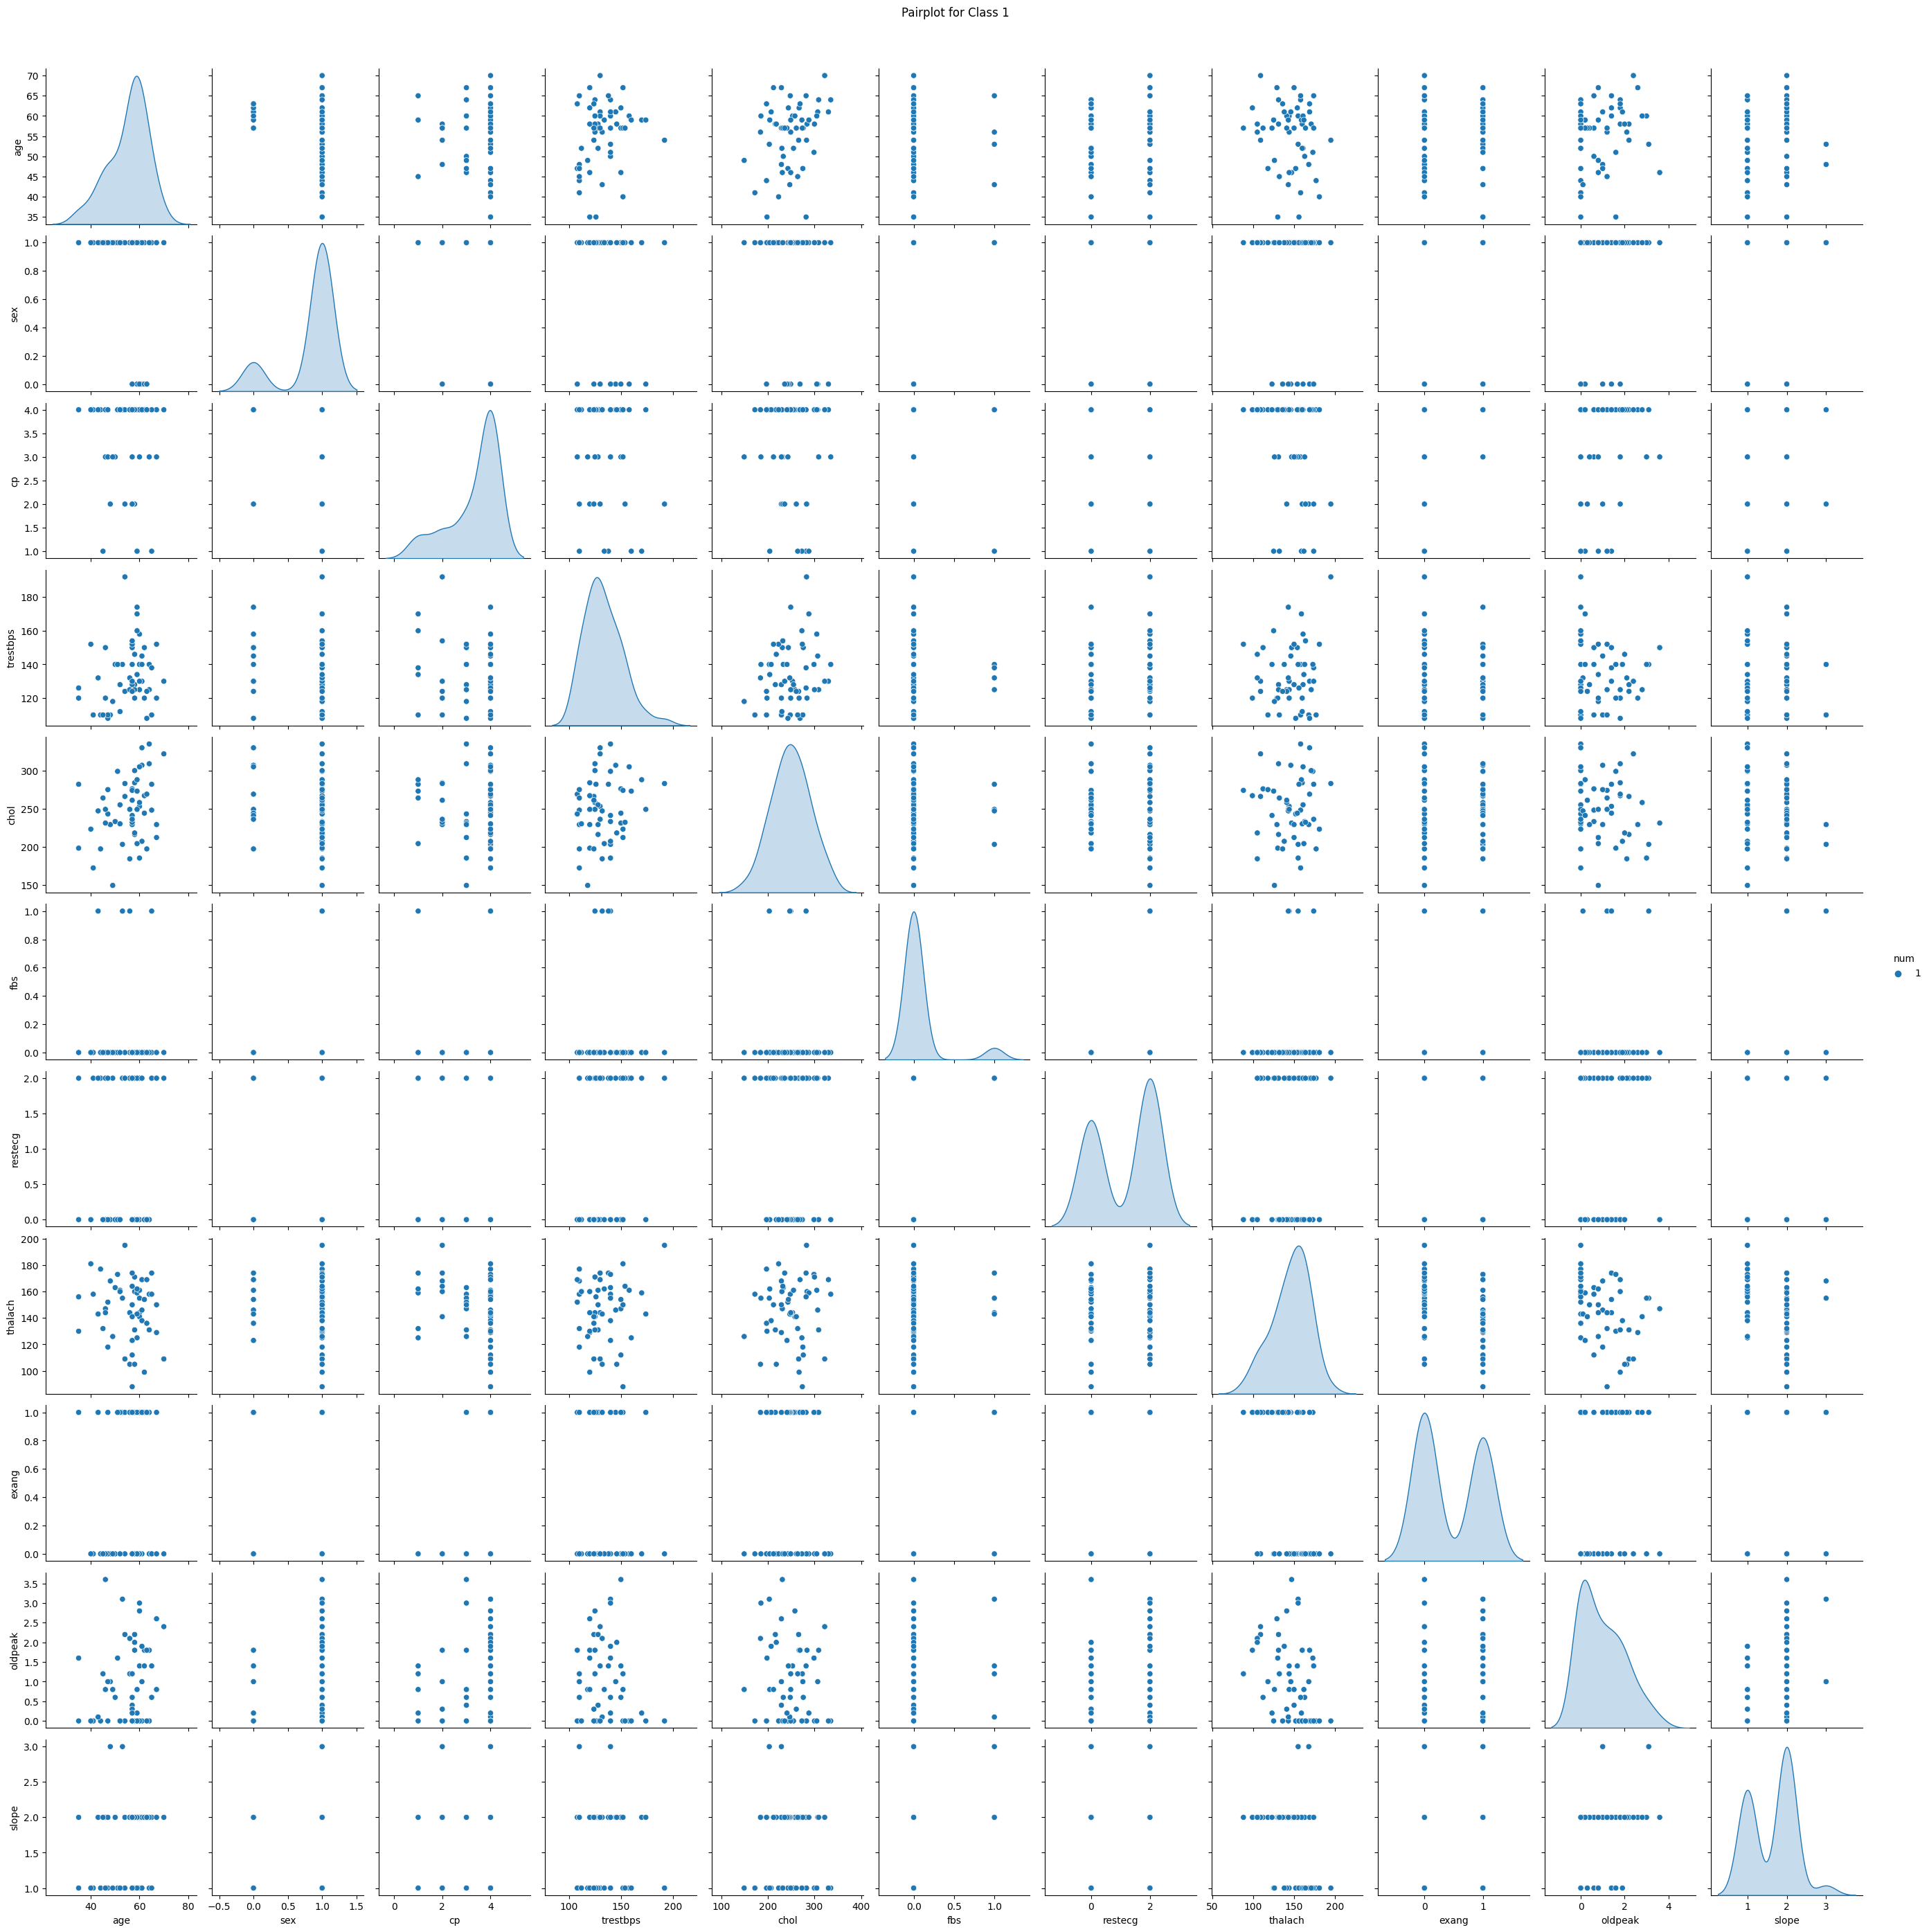

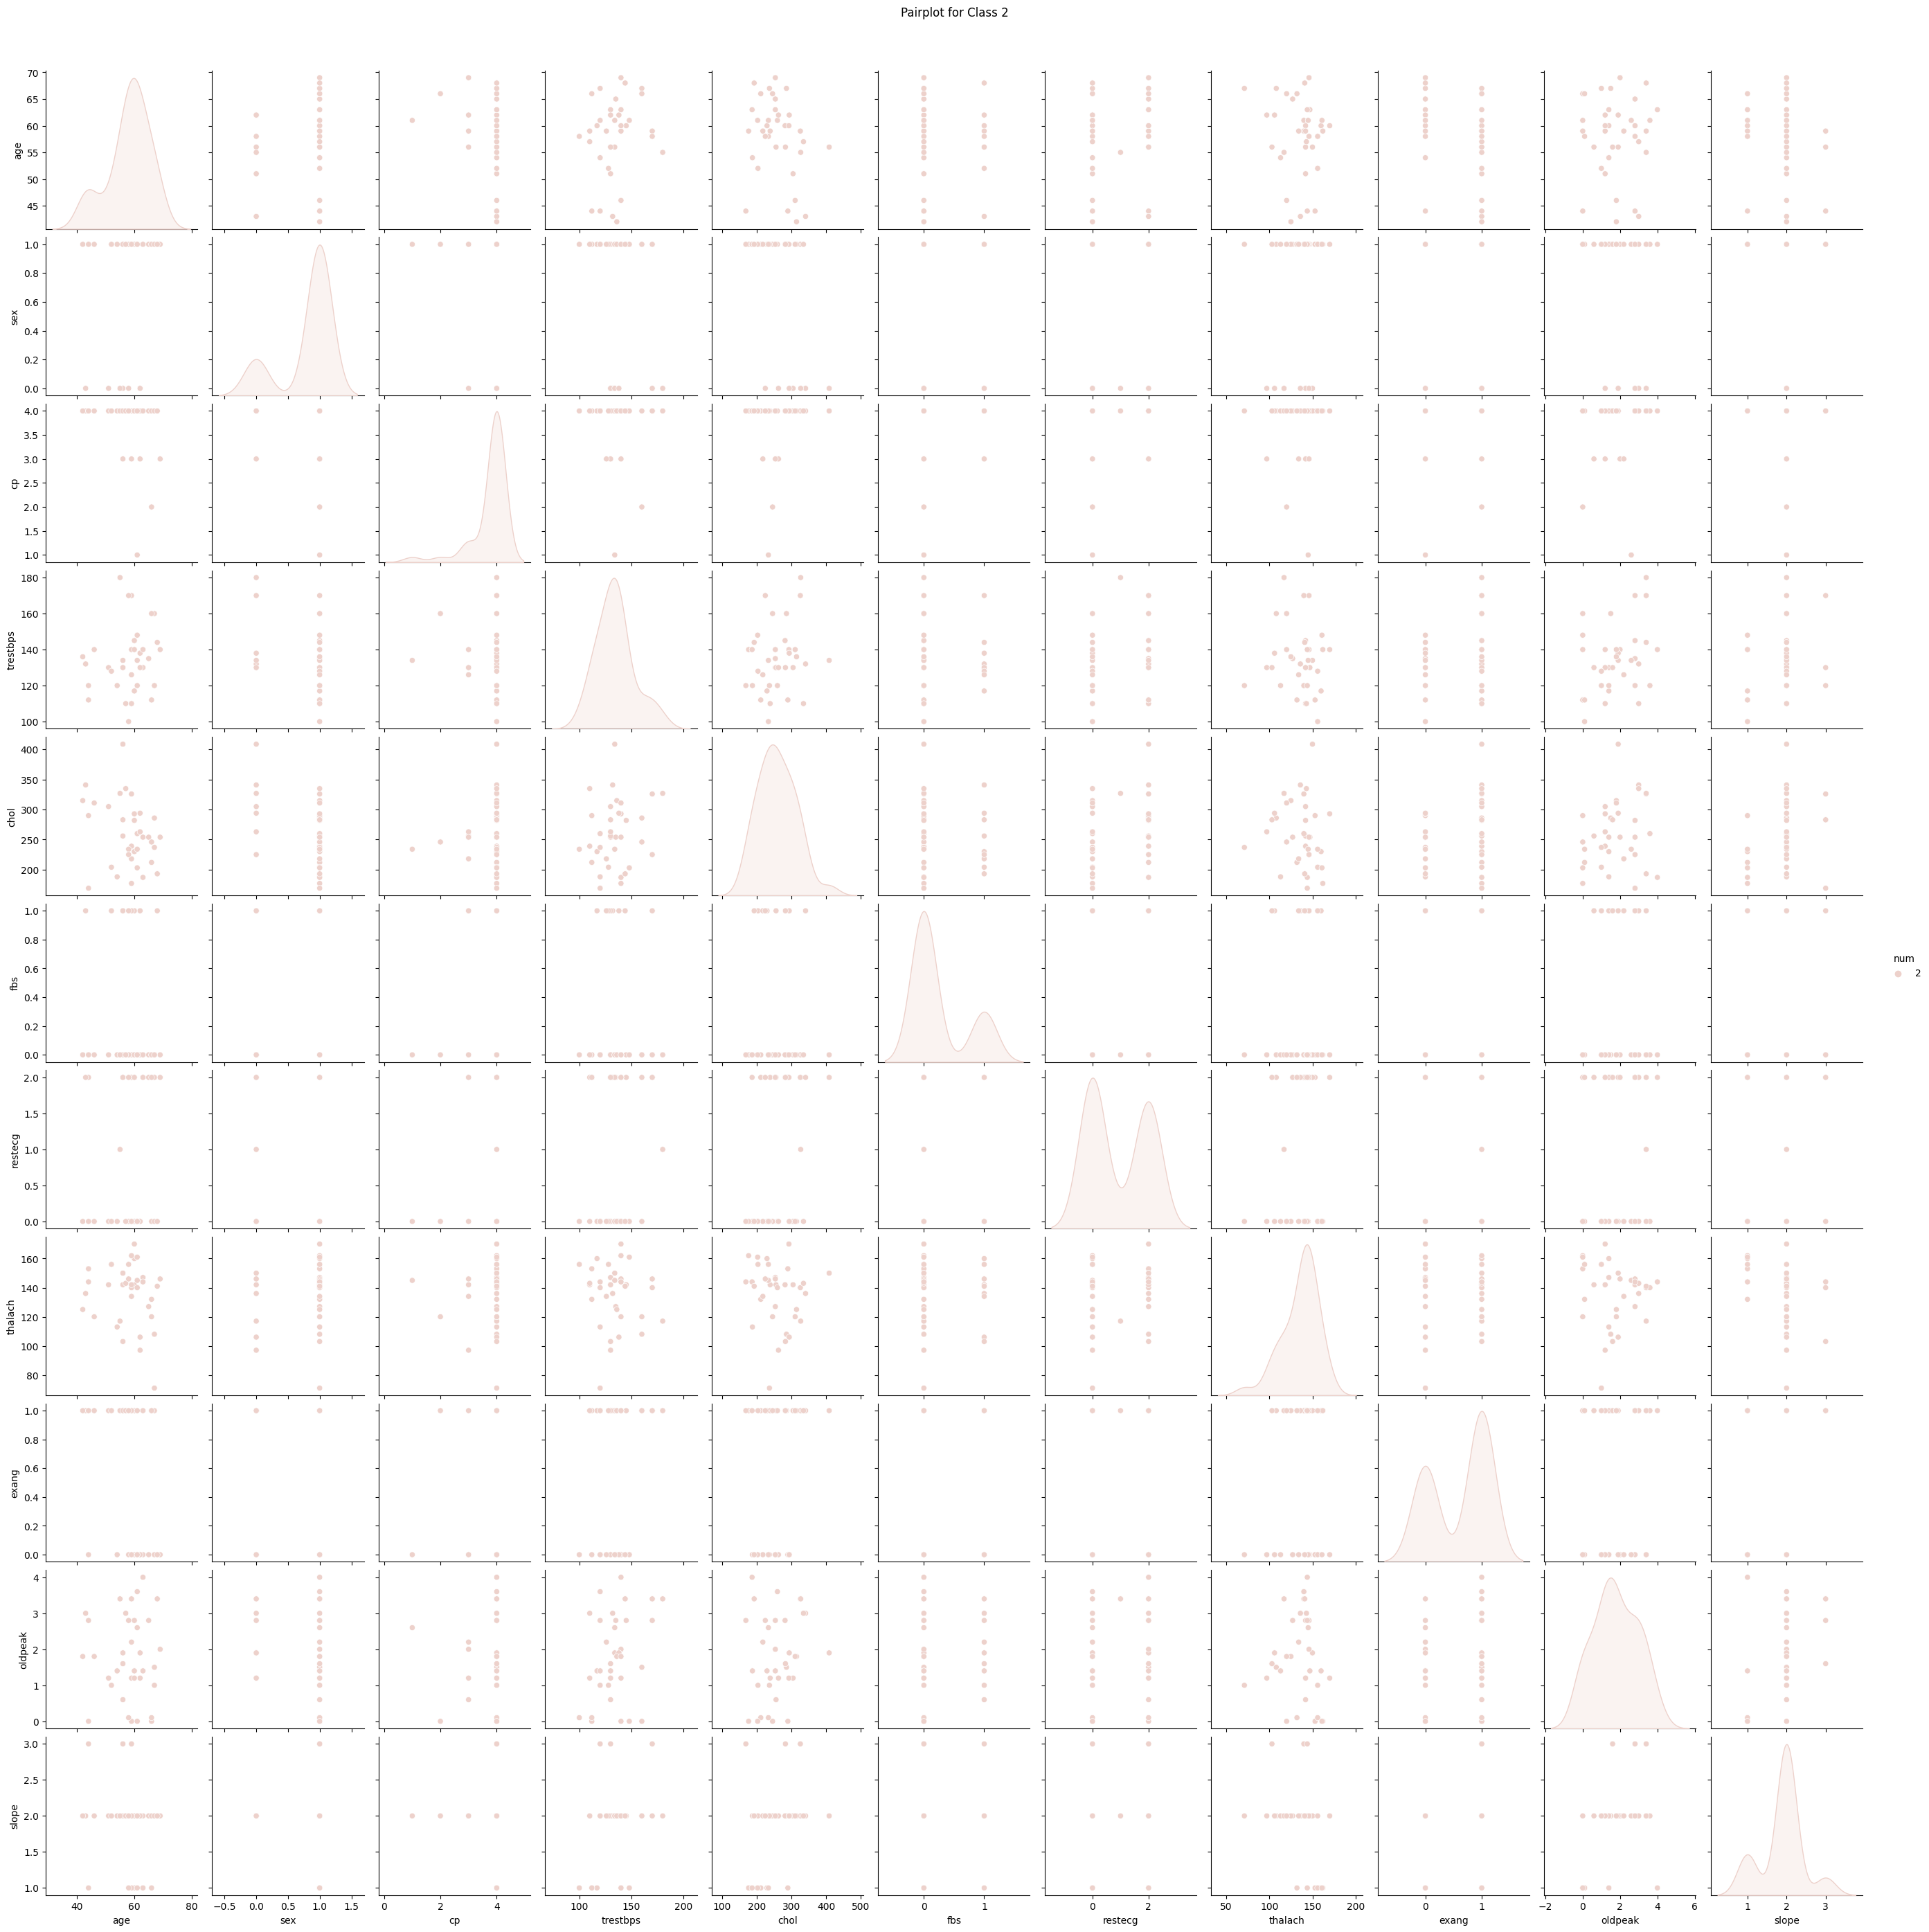

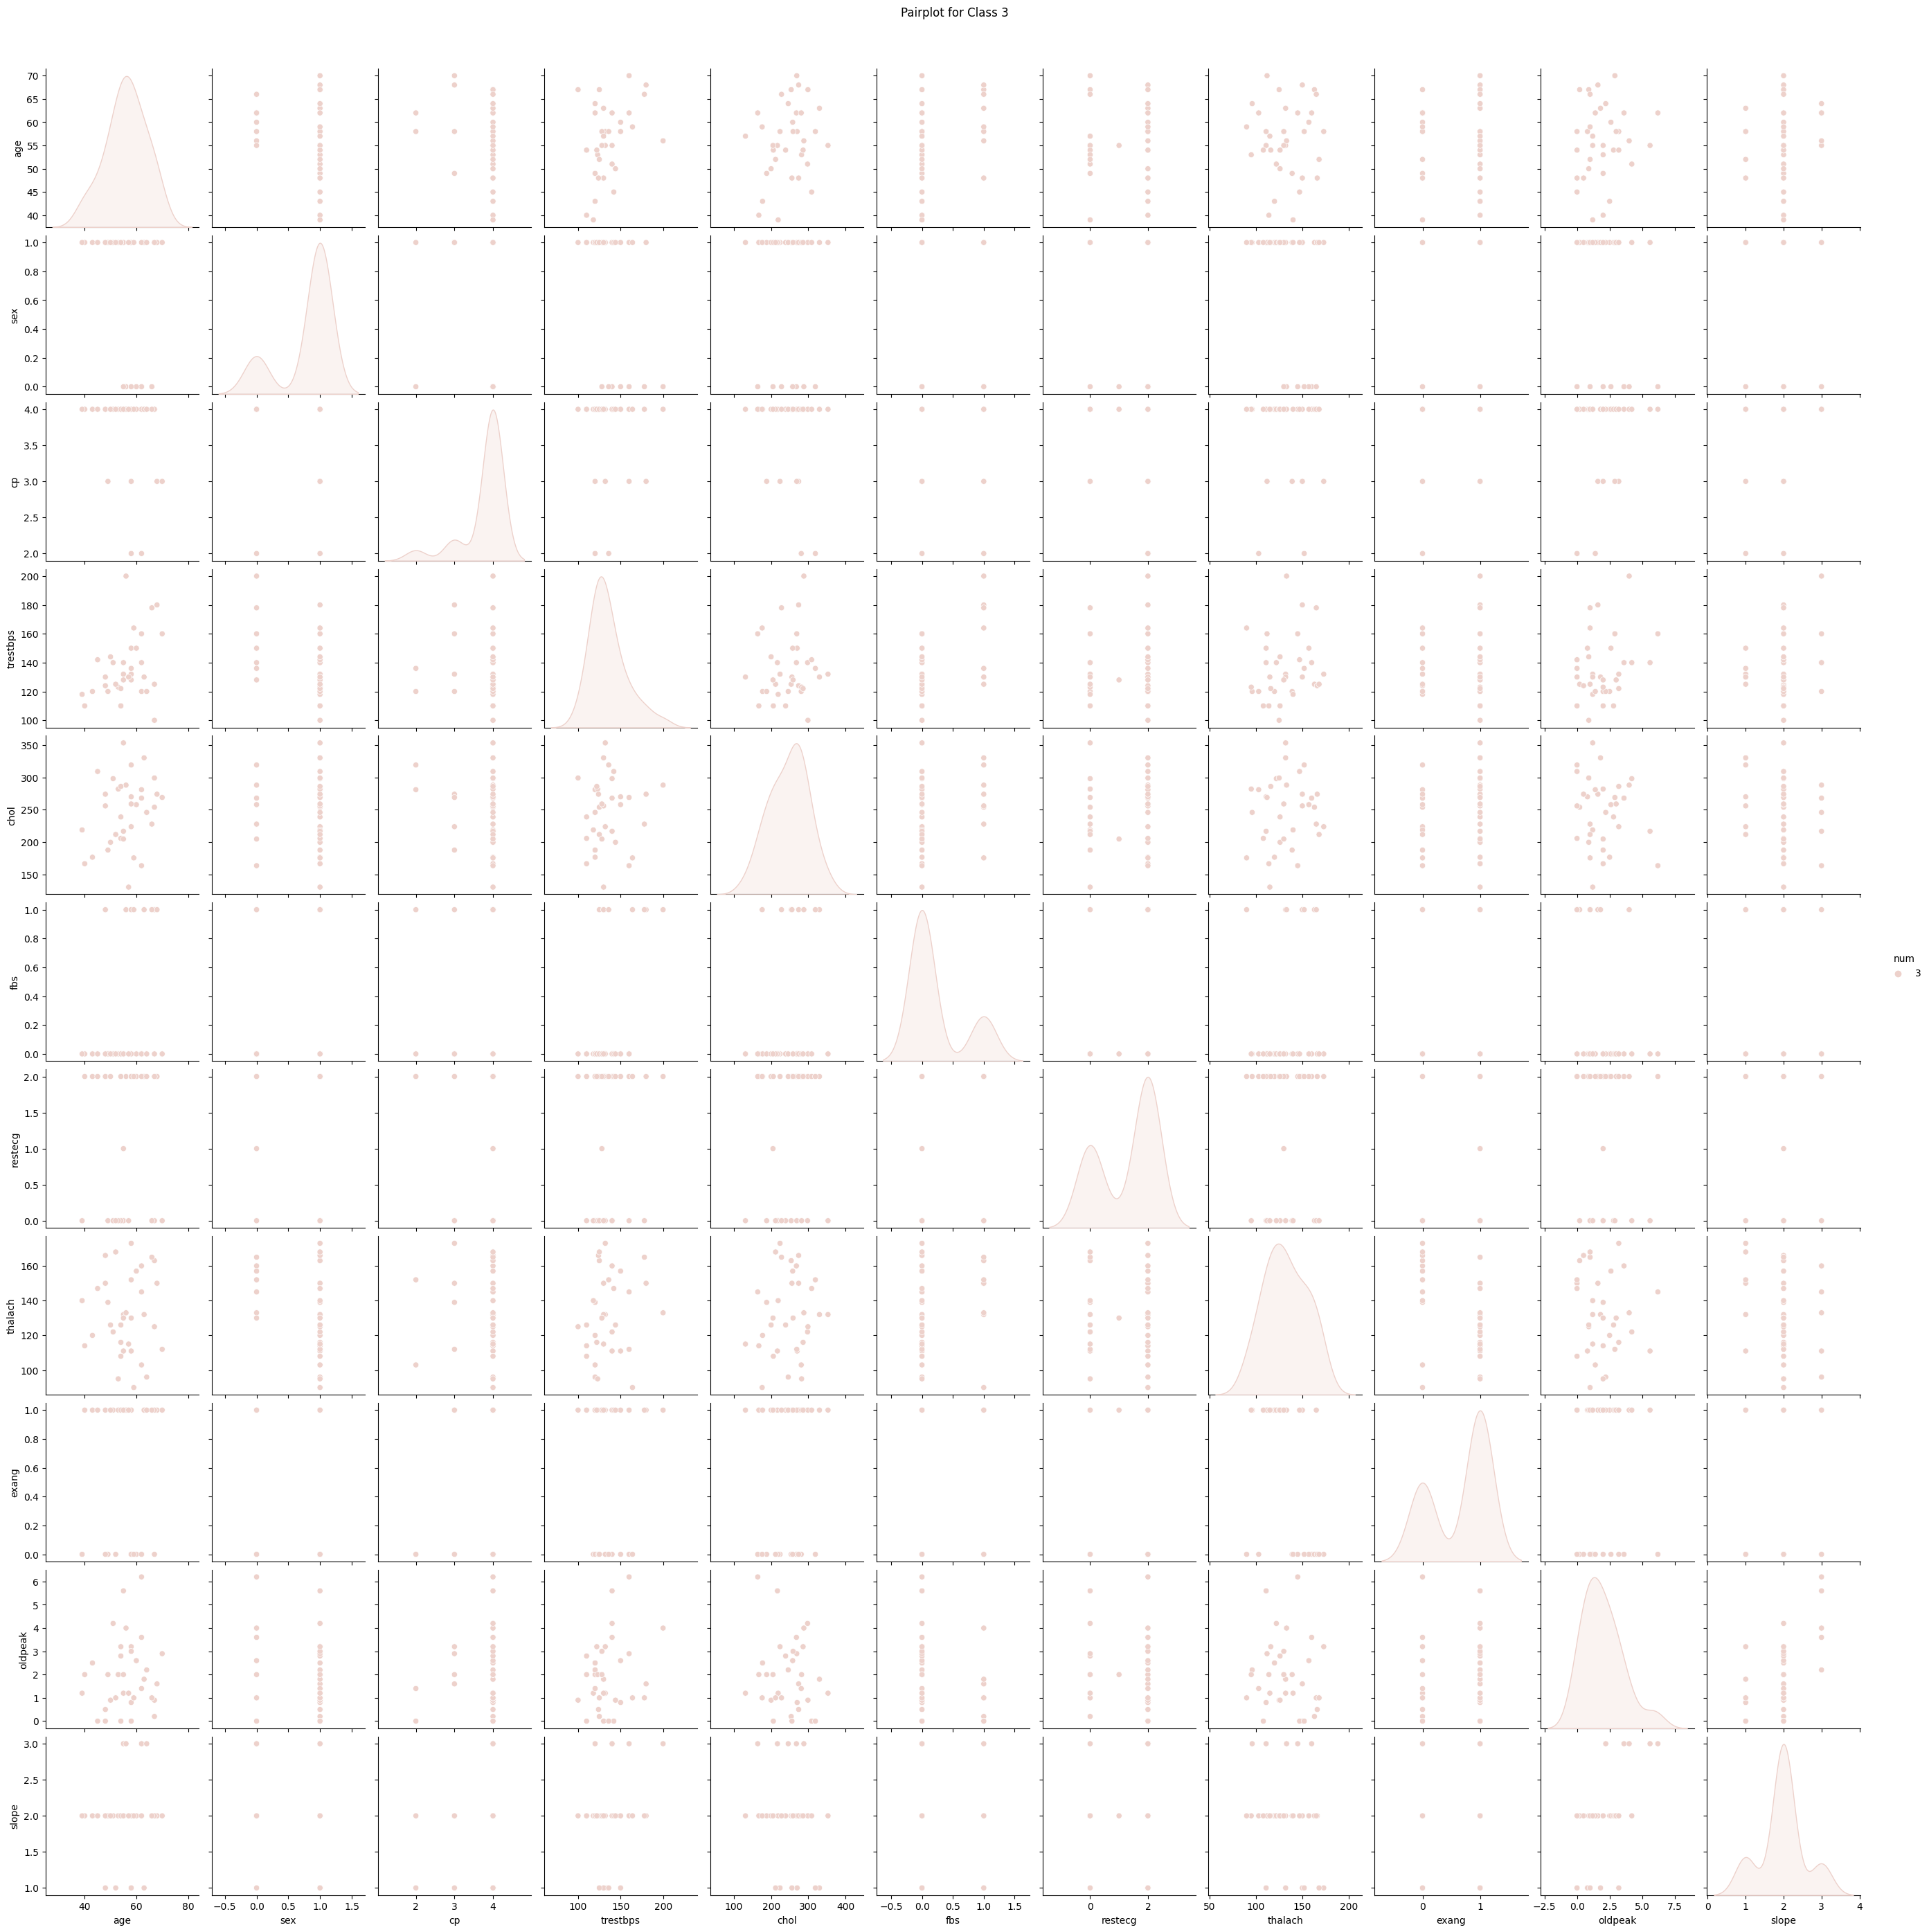

In [ ]:
# Exploratory Data Analysis(EDA)
pairplot_class_0 = sns.pairplot(data = data4[data4['num'] == 0], hue='num')
pairplot_class_0.fig.suptitle("Pairplot for Class 0", y = 1.02)
pairplot_class_1 = sns.pairplot(data = data4[data4['num'] == 1], hue='num')
pairplot_class_1.fig.suptitle("Pairplot for Class 1", y = 1.02)
pairplot_class_2 = sns.pairplot(data = data4[data4['num'] == 2], hue='num')
pairplot_class_2.fig.suptitle("Pairplot for Class 2", y = 1.02)
pairplot_class_3 = sns.pairplot(data = data4[data4['num'] == 3], hue='num')
pairplot_class_3.fig.suptitle("Pairplot for Class 3", y = 1.02)
plt.show()

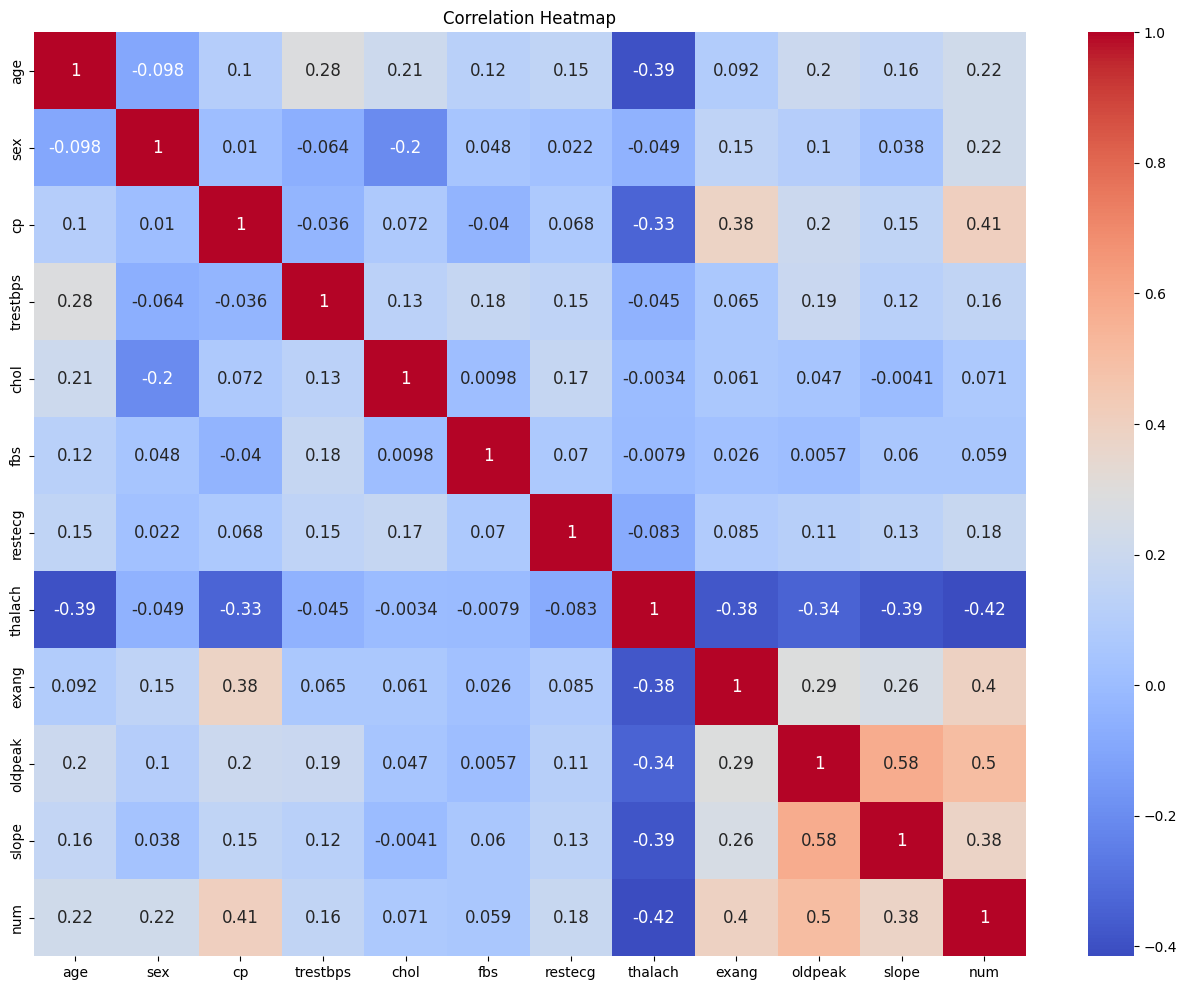

In [ ]:
correlation_matrix = data4.corr()

plt.figure(figsize=(16, 12))  # Set a custom figure size

# Adjust the fontsize and other properties of the annotations
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", annot_kws={"size": 12})

plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Compare Models and Select Top Models
setup(data4, target = 'num')
best_models = compare_models(sort = 'Recall')

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


              precision    recall  f1-score   support

           0       0.84      0.90      0.87        48
           1       0.29      0.24      0.26        17
           2       0.14      0.08      0.11        12
           3       0.22      0.40      0.29        10
           4       0.00      0.00      0.00         4

    accuracy                           0.57        91
   macro avg       0.30      0.32      0.30        91
weighted avg       0.54      0.57      0.55        91



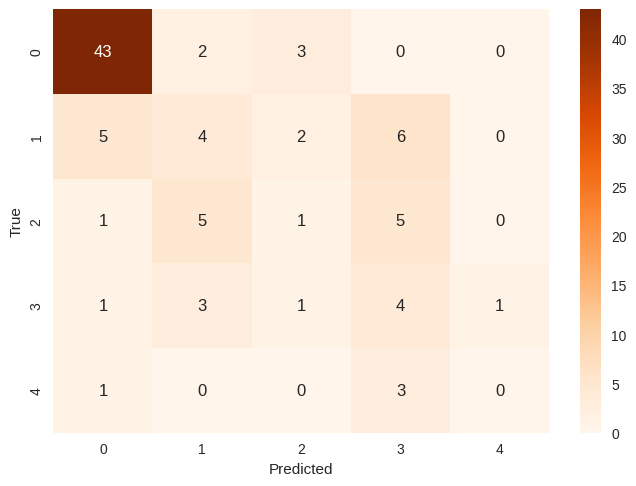

              precision    recall  f1-score   support

           0       0.80      0.90      0.84        48
           1       0.36      0.24      0.29        17
           2       0.29      0.17      0.21        12
           3       0.21      0.40      0.28        10
           4       0.00      0.00      0.00         4

    accuracy                           0.58        91
   macro avg       0.33      0.34      0.32        91
weighted avg       0.55      0.58      0.56        91



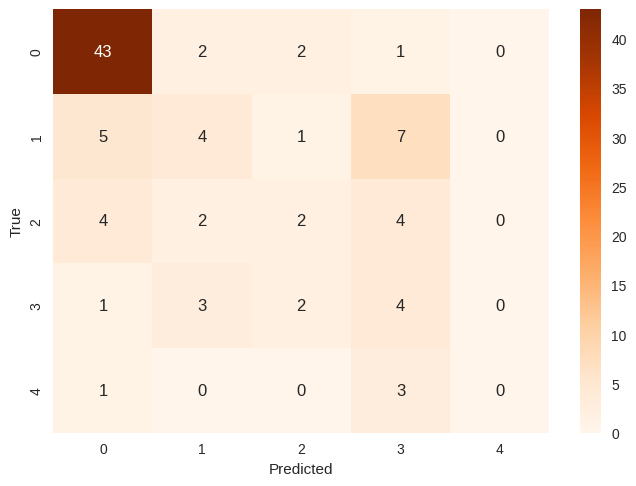

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        48
           1       0.27      0.24      0.25        17
           2       0.00      0.00      0.00        12
           3       0.21      0.40      0.28        10
           4       0.00      0.00      0.00         4

    accuracy                           0.55        91
   macro avg       0.27      0.30      0.28        91
weighted avg       0.53      0.55      0.53        91



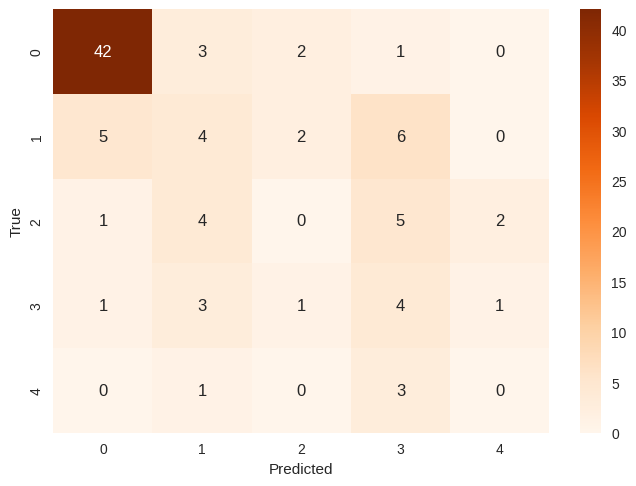

In [ ]:
# Manually Select Models
model1 = create_model('lr')
model2 = create_model('lda')
selected_models = [model1, model2]

# Fine-Tune Selected Models
tuned_models = [tune_model(model) for model in selected_models]

# Create a Hybrid Model (Voting Ensemble)
ensemble_model = VotingClassifier(estimators = [('Linear Regression', tuned_models[0]), ('Linear Discriminant', tuned_models[1])], voting = 'soft')

# Split the dataset into train and test sets
X = data4.drop('num', axis=1)
y = data4['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()

# Create an imputer with your preferred strategy (e.g., mean, median, mode)
imputer = SimpleImputer(strategy = 'most_frequent')

# Fit and transform the imputer on your dataset
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Training the hybrid model
ensemble_model.fit(X_train_imputed, y_train)

# Make predictions and evaluate the model
y_pred = ensemble_model.predict(X_test_imputed)
print(classification_report(y_test, y_pred))

# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Training of Model 1
model1.fit(X_train_imputed, y_train)
y_pred = model1.predict(X_test_imputed)
print(classification_report(y_test, y_pred))
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Training of Model 2
model2.fit(X_train_imputed, y_train)
y_pred = model2.predict(X_test_imputed)
print(classification_report(y_test, y_pred))
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()